In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
import descartes
import pylab as plot
from shapely.geometry import Point, Polygon
import numpy as np
import mapclassify as mc
import itertools
import rasterio
import rasterio.plot
%matplotlib inline

In [2]:
%matplotlib inline

In [292]:
class AtributoObrigatorio(Exception):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return repr(self.value)

def plot_indicator(df: pd.DataFrame, **kwargs) -> None:
    """
    Plota um mapa
    """
    try:
        figsize = kwargs['plot'].get('figsize', None)
    except KeyError:
        figsize = None
    try:
        cmap = kwargs['plot'].get('cmap', None)
    except KeyError:
        cmap = None
    try:
        k = kwargs['plot'].get('k', None)
    except KeyError:
        k = None
    try:
        linewidth = kwargs['plot'].get('linewidth', None)
    except KeyError:
        linewidth = None
    try:
        edgecolor = kwargs['plot'].get('edgecolor', None)
    except KeyError:
        edgecolor = None
    try:
        title_text = kwargs['plot'].get('title_text', None)
    except KeyError:
        title_text = None
    try:
        custom_column = kwargs.get('data_enconded', None)
    except KeyError:
        custom_column = None
    try:
        filename = kwargs.get('filename', None)
    except KeyError:
        filename = None
    if not custom_column:
        try:
            raise AtributoObrigatorio('custom_column')
        except AtributoObrigatorio as e:
            print("O Atributo custom_column é obrigatório.")
    else:
        fig, ax = plt.subplots(figsize=figsize, subplot_kw={'aspect':'equal'})
        df.assign(cl=custom_column.yb).plot(column='cl', cmap=cmap, k=k, ax=ax, categorical=True,
                                     linewidth=linewidth,
                                     edgecolor=edgecolor)
        if title_text:
            ax.set_title(f'{title_text}', size=20)
        ax.set_axis_off()
        if filename:
            plt.savefig(f"../imgs/{filename}.png")

def select_quantile_and_plot(df: pd.DataFrame, quantile: float, smaller_and_equal=True, **kwargs) -> None:
    #nome do indicador
    try:
        nome_indicador = kwargs['indicador']
    except KeyError:
        try:
            raise AtributoObrigatorio('indicador')
        except AtributoObrigatorio as e:
            print("O atributo indicador é obrigatório.")
    try:
        tipo_indicador = kwargs['tipo_indicador']
    except KeyError:
        try:
            raise AtributoObrigatorio('indicador')
        except AtributoObrigatorio as e:
            print("O atributo tipo_indicador é obrigatório.")            
    else:
        try:
            figsize = kwargs['plot'].get('figsize', None)
        except KeyError:
            figsize = None
        try:
            cmap = kwargs['plot'].get('cmap', None)
        except KeyError:
            cmap = None
        try:
            k = kwargs['plot'].get('k', None)
        except KeyError:
            k = None
        try:
            linewidth = kwargs['plot'].get('linewidth', None)
        except KeyError:
            linewidth = None
        try:
            edgecolor = kwargs['plot'].get('edgecolor', None)
        except KeyError:
            edgecolor = None
        try:
            title_text = kwargs['plot'].get('title_text', None)
        except KeyError:
            title_text = None
        try:
            filename = kwargs.get('filename', None)
        except KeyError:
            filename = None
        # SELECIONAR OS MUNICIPIOS DE ACORDO COM QUANTIL
        if smaller_and_equal:
            df_quantil = df[df[f'{nome_indicador}'] <= df[f'{nome_indicador}'].quantile(quantile)].copy()
        else:
            df_quantil = df[df[f'{nome_indicador}'] >= df[f'{nome_indicador}'].quantile(quantile)].copy()
        if tipo_indicador == 'ifdm':
            range_values=list(itertools.chain(df_quantil['Nota_2016'].tolist(), df_quantil['Nota_2010'].tolist()))
        if tipo_indicador == 'idhm':
            range_values=list(itertools.chain(df_quantil['IDHM 2010'].tolist(), df_quantil['IDHM 2000'].tolist()))
        quantil_quantiles = mc.Quantiles(range_values, k=10)
        quantil_custom = mc.User_Defined(df_quantil[f'{nome_indicador}'], bins=quantil_quantiles.bins)
        #plot
        fig, ax = plt.subplots(figsize=figsize, subplot_kw={'aspect':'equal'})
        df_quantil = df_quantil.assign(cl=quantil_custom.yb)
        df_quantil.plot(column='cl', cmap=cmap, k=k, ax=ax, categorical=True,
                                     linewidth=linewidth,
                                     edgecolor=edgecolor)
        if title_text:
            ax.set_title(f'{title_text}', size=20)
        ax.set_axis_off()
        if filename:
            plt.savefig(f"../imgs/{filename}.png", transparent=True)
        return df_quantil

In [6]:
mapa = gpd.read_file("../data/shps/Munic.shp")

In [7]:
mapa.head()

GEOCODIGO              NOME  UF  ID_UF REGIAO           MESOREGIAO  \
0    1200336       Mâncio Lima  AC     12  Norte        VALE DO JURUA   
1    1300201  Atalaia do Norte  AM     13  Norte  SUDOESTE AMAZONENSE   
2    1301654           Guajará  AM     13  Norte  SUDOESTE AMAZONENSE   
3    1200427   Rodrigues Alves  AC     12  Norte        VALE DO JURUA   
4    1200203   Cruzeiro do Sul  AC     12  Norte        VALE DO JURUA   

        MICROREGIA LATITUDE LONGITUDE  \
0  CRUZEIRO DO SUL   -7.614   -72.896   
1    ALTO SOLIMOES   -4.372   -70.192   
2            JURUA   -7.546   -72.584   
3  CRUZEIRO DO SUL   -7.742   -72.647   
4  CRUZEIRO DO SUL   -7.631    -72.67   

                                            geometry  
0  POLYGON ((-73.80098316 -7.111458, -73.73762495...  
1  POLYGON ((-73.80098316 -7.111458, -73.79617103...  
2  POLYGON ((-73.73762495999999 -7.13431700999999...  
3  POLYGON ((-73.69157987999999 -7.76778101999999...  
4  POLYGON ((-73.62958103999999 -8.05086, -73.423...

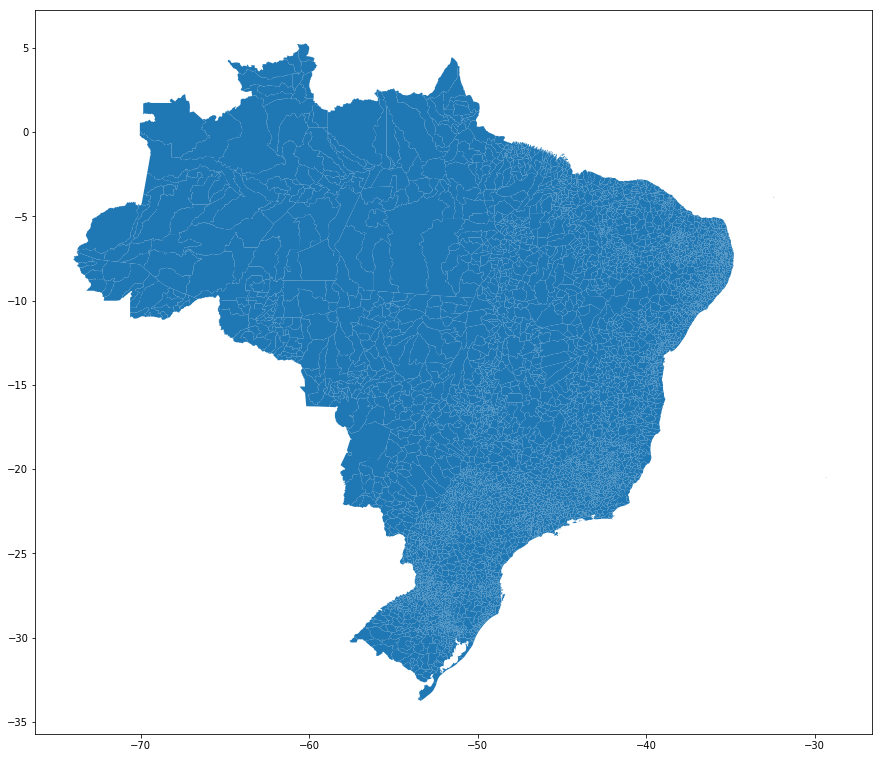

In [8]:
fig, ax = plt.subplots(figsize= (15,15))
mapa.plot(ax=ax);

# Semiárido Brasileiro

### https://www.ibge.gov.br/geociencias/cartas-e-mapas/mapas-regionais/15974-semiarido-brasileiro.html?=&t=o-que-e

O Semiárido brasileiro é composto por 1 262 municípios, dos estados do Maranhão, Piauí, Ceará, Rio Grande do Norte, Paraíba, Pernambuco, Alagoas, Sergipe, Bahia e Minas Gerais. Os critérios para delimitação do Semiárido foram a precipitação pluviométrica média anual igual ou inferior a 800 mm; o índice de Aridez de Thornthwaite igual ou inferior a 0,50 e; o percentual diário de déficit hídrico igual ou superior a 60%, considerando todos os dias do ano. A competência para fixar critérios técnicos e científicos para delimitação do Semiárido foi dada ao Conselho Deliberativo - CONDEL da Superintendência do Desenvolvimento do Nordeste - SUDENE pela Lei Complementar nº 125, de 3 de janeiro de 2007.

In [9]:
#dados do semiarido
sard = pd.read_excel("../data/semiarido/lista_municipios_Semiarido_2017_11_23.xlsx", sheet_name='municipios')

In [10]:
sard.head()

Código da Unidade da Federação Nome da Unidade da Federação  \
0                              21                     Maranhão   
1                              21                     Maranhão   
2                              22                        Piauí   
3                              22                        Piauí   
4                              22                        Piauí   

   Código do Município   Nome do Município  Ano de Instalação do Município  
0              2100907            Araioses                            1893  
1              2112209               Timon                            1890  
2              2200053               Acauã                            1997  
3              2200251  Alagoinha do Piauí                            1986  
4              2200277   Alegrete do Piauí                            1993

In [11]:
## SELECIONA UM DATAFRAME PARA O SEMIARIDO
cod_mun_semi_arido = sard['Código do Município'].unique().tolist()
gis_semiarido = mapa[mapa['GEOCODIGO'].isin(cod_mun_semi_arido)].copy()

In [12]:
## número de municipios do semi arido
gis_semiarido['GEOCODIGO'].nunique()

1262

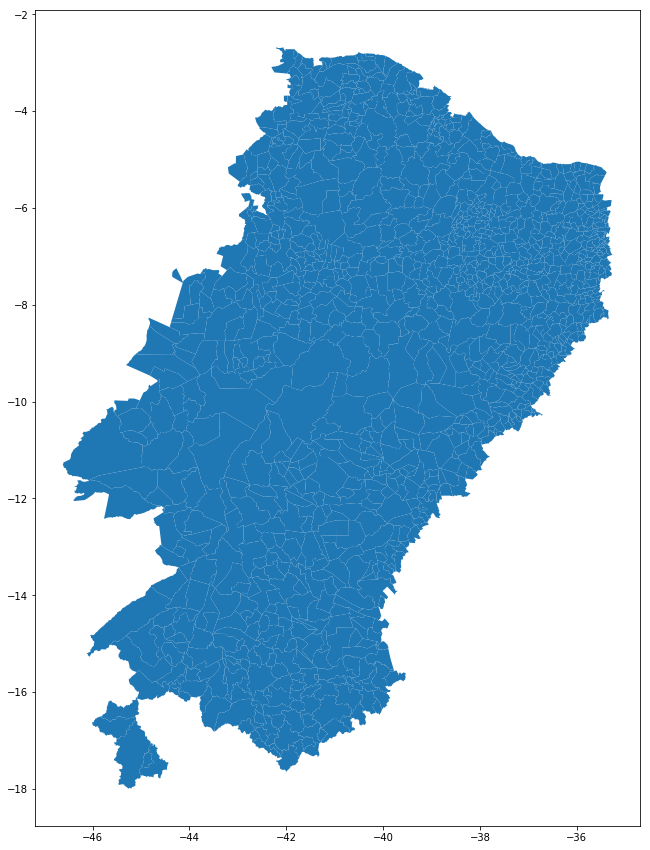

In [13]:
fig2, ax2 = plt.subplots(figsize= (15,15))
gis_semiarido.plot(ax=ax2);

In [14]:
gis_semiarido.head()

GEOCODIGO                  NOME  UF  ID_UF    REGIAO  \
2885    2911105  Formosa do Rio Preto  BA     29  Nordeste   
2923    2903201             Barreiras  BA     29  Nordeste   
2974    2908101                 Cocos  BA     29  Nordeste   
2984    3157609     Santa Fé de Minas  MG     31   Sudeste   
3013    2926202     Riachão das Neves  BA     29  Nordeste   

                MESOREGIAO              MICROREGIA LATITUDE LONGITUDE  \
2885  EXTREMO OESTE BAIANO               BARREIRAS  -11.048   -45.193   
2923  EXTREMO OESTE BAIANO               BARREIRAS  -12.153    -44.99   
2974  EXTREMO OESTE BAIANO  SANTA MARIA DA VITORIA  -14.184   -44.534   
2984        NORTE DE MINAS                PIRAPORA   -16.69   -45.414   
3013  EXTREMO OESTE BAIANO               BARREIRAS  -11.746    -44.91   

                                               geometry  
2885  POLYGON ((-46.60920792 -11.25549999, -46.58163...  
2923  POLYGON ((-46.337472 -11.81600496, -46.3311928...  
2974  POLYGON ((-45.97449588 -15.00714099, -45.97809...  
2984  POLYGON ((-45.90996516 -16.53031701, -45.89120...  
3013  POLYGON ((-46.06663284 -11.61865197, -45.88338...

### DADOS IDHM

In [17]:
idhm = pd.read_excel("../data/ibge/IDHM.xlsx")

In [18]:
idhm.columns

Index(['Código', 'Espacialidades', 'IDHM 1991', 'IDHM 2000', 'IDHM 2010',
       'IDHM Renda 1991', 'IDHM Renda 2000', 'IDHM Renda 2010',
       'IDHM Longevidade 1991', 'IDHM Longevidade 2000',
       'IDHM Longevidade 2010', 'IDHM Educação 1991', 'IDHM Educação 2000',
       'IDHM Educação 2010'],
      dtype='object')

In [19]:
idhm_global = idhm[['Código', 'Espacialidades', 'IDHM 1991', 'IDHM 2000', 'IDHM 2010']].copy()

In [20]:
idhm_global = idhm_global.drop(index=0)

In [21]:
idhm_global.head()

Código       Espacialidades  IDHM 1991  IDHM 2000  IDHM 2010
1  5200050      Abadia de Goiás      0.408      0.569      0.708
2  3100104  Abadia dos Dourados      0.449      0.575      0.689
3  5200100            Abadiânia      0.410      0.503      0.689
4  3100203               Abaeté      0.417      0.587      0.698
5  1500107           Abaetetuba      0.386      0.501      0.628

In [22]:
gis_merge = gis_semiarido.merge(idhm_global, how='left', left_on='GEOCODIGO', right_on='Código').copy()

In [23]:
gis_merge.shape

(1262, 15)

In [24]:
cmap = 'YlOrRd'
figsize = (20, 10)
colors = 9

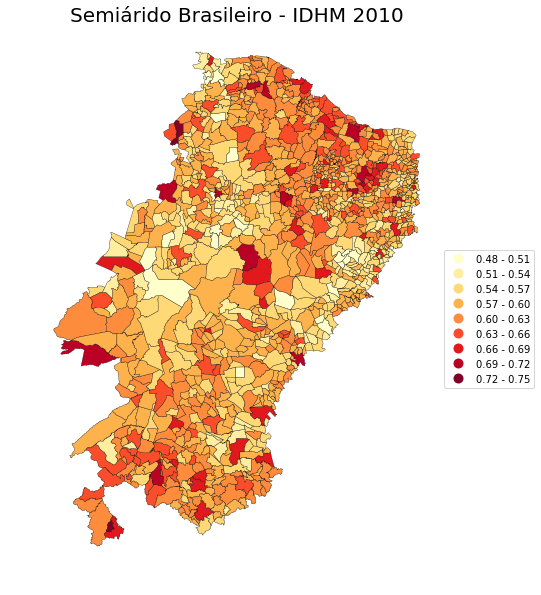

In [25]:
ax = gis_merge.dropna().plot(column='IDHM 2010', 
                             cmap=cmap, 
                             figsize=figsize, 
                             scheme='equal_interval', 
                             k=colors, 
                             legend=True,
                             linewidth=0.3,
                             edgecolor='black')
ax.get_legend().set_bbox_to_anchor((1.25, .6))
ax.set_axis_off()
ax.set_title('Semiárido Brasileiro - IDHM 2010', size=20);

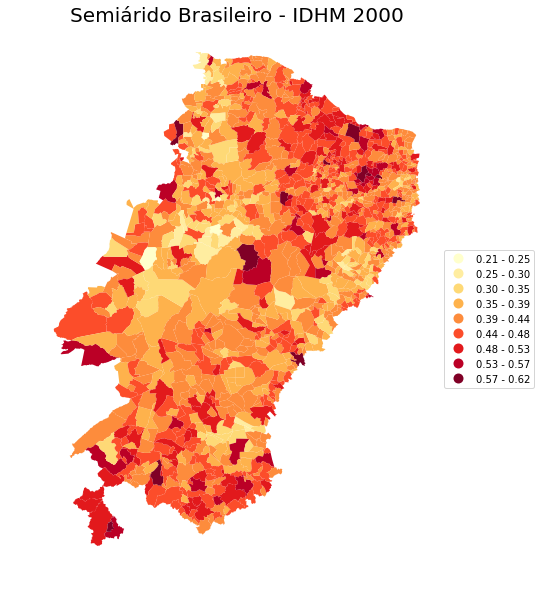

In [26]:
ax = gis_merge.dropna().plot(column='IDHM 2000', cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
ax.get_legend().set_bbox_to_anchor((1.25, .6))
ax.set_axis_off()
ax.set_title('Semiárido Brasileiro - IDHM 2000', size=20);

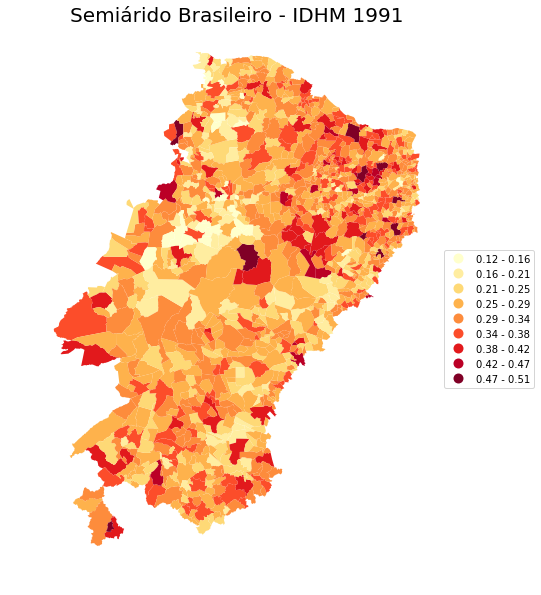

In [27]:
ax = gis_merge.dropna().plot(column='IDHM 1991', cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
ax.get_legend().set_bbox_to_anchor((1.25, .6))
ax.set_axis_off()
ax.set_title('Semiárido Brasileiro - IDHM 1991', size=20);

In [28]:
all_range_idhm=list(itertools.chain(gis_merge['IDHM 1991'].tolist(),gis_merge['IDHM 2000'].tolist(),gis_merge['IDHM 2010'].tolist()))

In [29]:
quantiles = mc.Quantiles(all_range_idhm, k=10)
quantiles

               Quantiles               
 
Lower          Upper              Count
        x[i] <= 0.259               384
0.259 < x[i] <= 0.301               381
0.301 < x[i] <= 0.343               373
0.343 < x[i] <= 0.390               384
0.390 < x[i] <= 0.426               371
0.426 < x[i] <= 0.470               379
0.470 < x[i] <= 0.549               386
0.549 < x[i] <= 0.583               382
0.583 < x[i] <= 0.609               369
0.609 < x[i] <= 0.751               377

In [30]:
custom_1991 = mc.User_Defined(gis_merge['IDHM 1991'], bins=[.259, .301, .343, .390, .426, .470, .549, .583, .609, .751])
custom_1991

              User Defined             
 
Lower          Upper              Count
        x[i] <= 0.259               379
0.259 < x[i] <= 0.301               356
0.301 < x[i] <= 0.343               300
0.343 < x[i] <= 0.390               148
0.390 < x[i] <= 0.426                48
0.426 < x[i] <= 0.470                25
0.470 < x[i] <= 0.549                 6
0.549 < x[i] <= 0.583                 0
0.583 < x[i] <= 0.609                 0
0.609 < x[i] <= 0.751                 0

In [31]:
custom_2000 = mc.User_Defined(gis_merge['IDHM 2000'], bins=[.259, .301, .343, .390, .426, .470, .549, .583, .609, .751])
custom_2000

              User Defined             
 
Lower          Upper              Count
        x[i] <= 0.259                 5
0.259 < x[i] <= 0.301                25
0.301 < x[i] <= 0.343                73
0.343 < x[i] <= 0.390               236
0.390 < x[i] <= 0.426               323
0.426 < x[i] <= 0.470               354
0.470 < x[i] <= 0.549               216
0.549 < x[i] <= 0.583                21
0.583 < x[i] <= 0.609                 6
0.609 < x[i] <= 0.751                 3

In [32]:
custom_2010 = mc.User_Defined(gis_merge['IDHM 2010'], bins=[.259, .301, .343, .390, .426, .470, .549, .583, .609, .751])
custom_2010

              User Defined             
 
Lower          Upper              Count
        x[i] <= 0.259                 0
0.259 < x[i] <= 0.301                 0
0.301 < x[i] <= 0.343                 0
0.343 < x[i] <= 0.390                 0
0.390 < x[i] <= 0.426                 0
0.426 < x[i] <= 0.470                 0
0.470 < x[i] <= 0.549               164
0.549 < x[i] <= 0.583               361
0.583 < x[i] <= 0.609               363
0.609 < x[i] <= 0.751               374

In [34]:
custom_2010.bins

array([0.259, 0.301, 0.343, 0.39 , 0.426, 0.47 , 0.549, 0.583, 0.609,
       0.751])

## REFORMATAR O DATASET

In [35]:
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plot.rcParams.update(params)

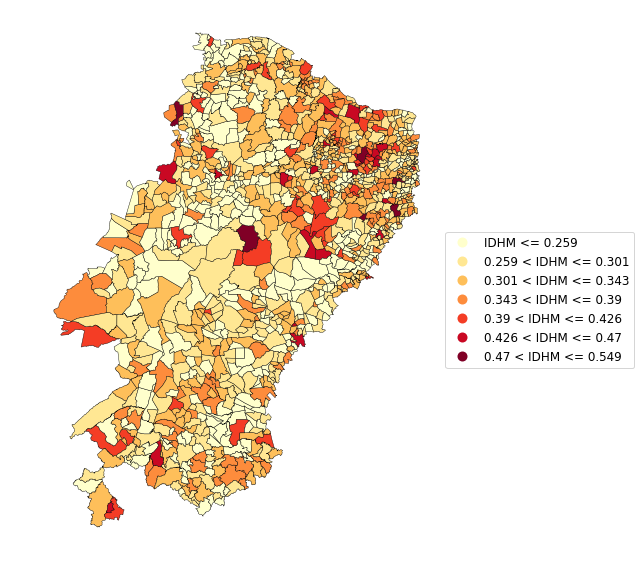

In [170]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gis_merge.assign(cl=custom_1991.yb).plot(column='cl', cmap=cmap, k=10, legend=True, ax=ax, categorical=True,
                             linewidth=0.4,
                             edgecolor='black')
leg = ax.get_legend()
leg.get_texts()[0].set_text(f'IDHM <= {custom_2010.bins[0]}')
leg.get_texts()[1].set_text(f'{custom_2010.bins[0]} < IDHM <= {custom_2010.bins[1]}')
leg.get_texts()[2].set_text(f'{custom_2010.bins[1]} < IDHM <= {custom_2010.bins[2]}')
leg.get_texts()[3].set_text(f'{custom_2010.bins[2]} < IDHM <= {custom_2010.bins[3]}')
leg.get_texts()[4].set_text(f'{custom_2010.bins[3]} < IDHM <= {custom_2010.bins[4]}')
leg.get_texts()[5].set_text(f'{custom_2010.bins[4]} < IDHM <= {custom_2010.bins[5]}')
leg.get_texts()[6].set_text(f'{custom_2010.bins[5]} < IDHM <= {custom_2010.bins[6]}')
ax.get_legend().set_bbox_to_anchor((1.5, .6))
ax.set_axis_off()
plt.savefig('../imgs/idhm_1991.png')

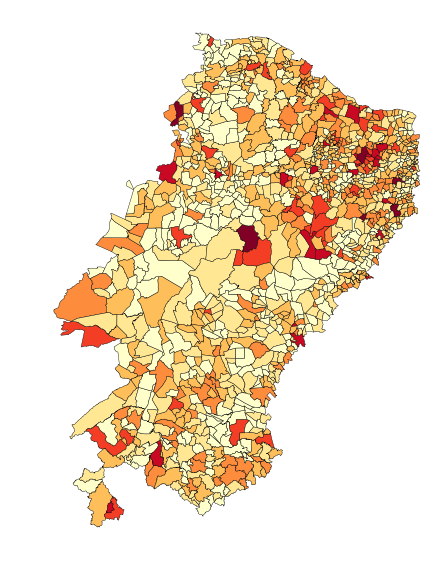

In [171]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gis_merge.assign(cl=custom_1991.yb).plot(column='cl', cmap=cmap, k=10, ax=ax, categorical=True,
                             linewidth=0.4,
                             edgecolor='black')
ax.set_axis_off()
plt.savefig('../imgs/idhm_1991_without_legend.png')

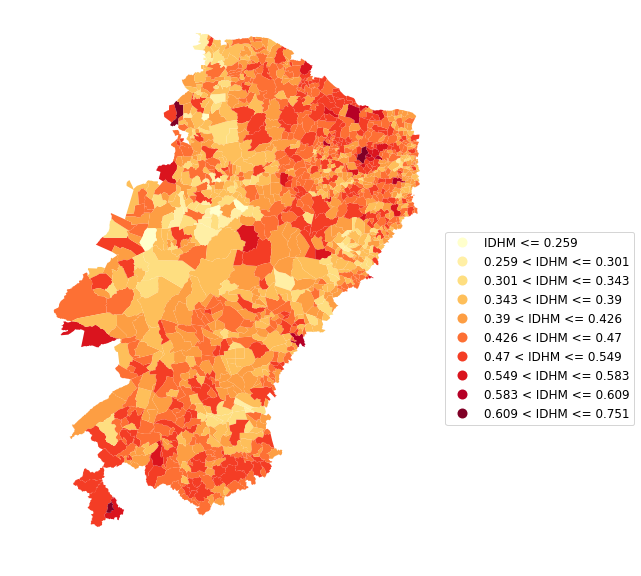

In [167]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gis_merge.assign(cl=custom_2000.yb).plot(column='cl', cmap=cmap, k=10, legend=True, ax=ax, categorical=True)
leg = ax.get_legend()
leg.get_texts()[0].set_text(f'IDHM <= {custom_2010.bins[0]}')
leg.get_texts()[1].set_text(f'{custom_2010.bins[0]} < IDHM <= {custom_2010.bins[1]}')
leg.get_texts()[2].set_text(f'{custom_2010.bins[1]} < IDHM <= {custom_2010.bins[2]}')
leg.get_texts()[3].set_text(f'{custom_2010.bins[2]} < IDHM <= {custom_2010.bins[3]}')
leg.get_texts()[4].set_text(f'{custom_2010.bins[3]} < IDHM <= {custom_2010.bins[4]}')
leg.get_texts()[5].set_text(f'{custom_2010.bins[4]} < IDHM <= {custom_2010.bins[5]}')
leg.get_texts()[6].set_text(f'{custom_2010.bins[5]} < IDHM <= {custom_2010.bins[6]}')
leg.get_texts()[7].set_text(f'{custom_2010.bins[6]} < IDHM <= {custom_2010.bins[7]}')
leg.get_texts()[8].set_text(f'{custom_2010.bins[7]} < IDHM <= {custom_2010.bins[8]}')
leg.get_texts()[9].set_text(f'{custom_2010.bins[8]} < IDHM <= {custom_2010.bins[9]}')
ax.get_legend().set_bbox_to_anchor((1.5, .6))
ax.set_axis_off()
plt.savefig('../imgs/idhm_2000.png')

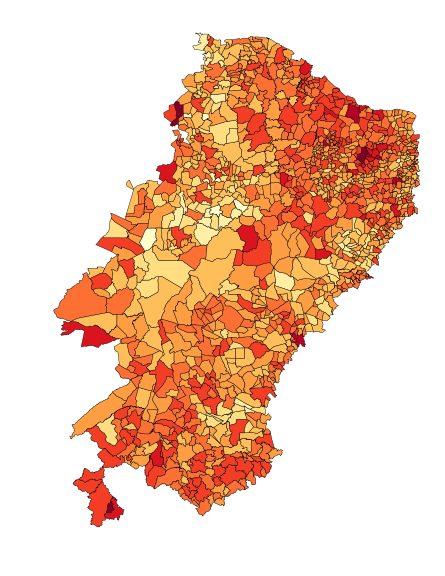

In [172]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gis_merge.assign(cl=custom_2000.yb).plot(column='cl', cmap=cmap, k=10, ax=ax, categorical=True,
                             linewidth=0.4,
                             edgecolor='black')
ax.set_axis_off()
plt.savefig('../imgs/idhm_2000_without_legend.png')

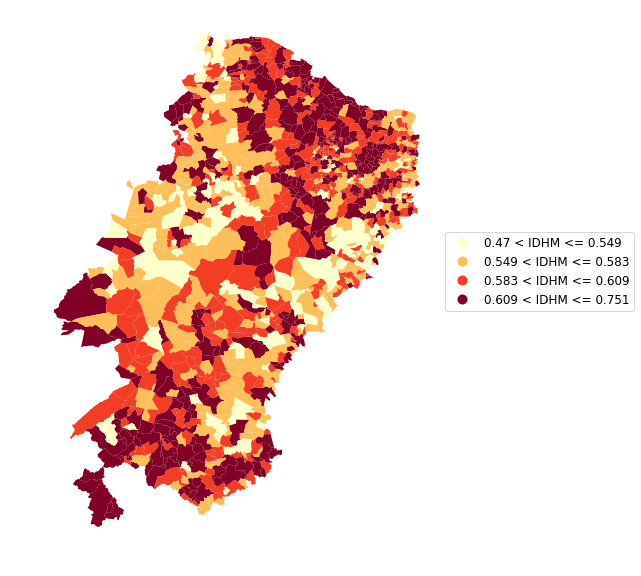

In [168]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gis_merge.assign(cl=custom_2010.yb).plot(column='cl', cmap=cmap, k=10, legend=True, ax=ax, categorical=True)
leg = ax.get_legend()
leg.get_texts()[0].set_text(f'{custom_2010.bins[5]} < IDHM <= {custom_2010.bins[6]}')
leg.get_texts()[1].set_text(f'{custom_2010.bins[6]} < IDHM <= {custom_2010.bins[7]}')
leg.get_texts()[2].set_text(f'{custom_2010.bins[7]} < IDHM <= {custom_2010.bins[8]}')
leg.get_texts()[3].set_text(f'{custom_2010.bins[8]} < IDHM <= {custom_2010.bins[9]}')
ax.get_legend().set_bbox_to_anchor((1.5, .6))
ax.set_axis_off()
plt.savefig('../imgs/idhm_2010.png')

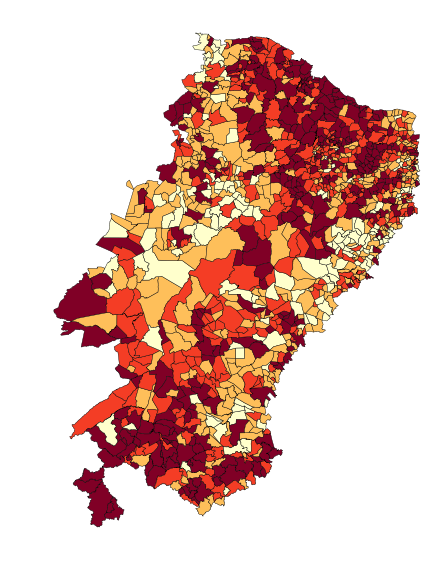

In [173]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gis_merge.assign(cl=custom_2010.yb).plot(column='cl', cmap=cmap, k=10, ax=ax, categorical=True,
                             linewidth=0.4,
                             edgecolor='black')
ax.set_axis_off()
plt.savefig('../imgs/idhm_2010_without_legend.png')

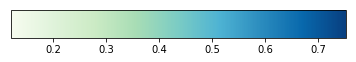

In [249]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=min(all_range_idhm), vmax=max(all_range_idhm))

cb1 = mpl.colorbar.ColorbarBase(ax, cmap='GnBu',
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('IDHM')
#fig.show()
plt.savefig('../imgs/colorbar_idhm_semiarido_GnBu.png')

In [250]:
exporta_dados = gis_merge[['GEOCODIGO', 'NOME', 'UF', 'ID_UF', 'REGIAO', 'MESOREGIAO',
       'MICROREGIA', 'LATITUDE', 'LONGITUDE', 'Código',
       'Espacialidades', 'IDHM 1991', 'IDHM 2000', 'IDHM 2010']].copy()

In [254]:
exporta_dados.to_excel("../data/BI/idhm_brasil.xlsx", index=False)

In [253]:
!pip install openpyxl

  Stored in directory: C:\Users\josefn\AppData\Local\pip\Cache\wheels\82\cd\05\2e1db4b561fda743444f9573f2c5090a7b991200c92770dd7a
  Stored in directory: C:\Users\josefn\AppData\Local\pip\Cache\wheels\2a\77\35\0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


In [248]:
gis_merge.head()

GEOCODIGO                  NOME  UF  ID_UF    REGIAO            MESOREGIAO  \
0    2911105  Formosa do Rio Preto  BA     29  Nordeste  EXTREMO OESTE BAIANO   
1    2903201             Barreiras  BA     29  Nordeste  EXTREMO OESTE BAIANO   
2    2908101                 Cocos  BA     29  Nordeste  EXTREMO OESTE BAIANO   
3    3157609     Santa Fé de Minas  MG     31   Sudeste        NORTE DE MINAS   
4    2926202     Riachão das Neves  BA     29  Nordeste  EXTREMO OESTE BAIANO   

               MICROREGIA LATITUDE LONGITUDE  \
0               BARREIRAS  -11.048   -45.193   
1               BARREIRAS  -12.153    -44.99   
2  SANTA MARIA DA VITORIA  -14.184   -44.534   
3                PIRAPORA   -16.69   -45.414   
4               BARREIRAS  -11.746    -44.91   

                                            geometry   Código  \
0  POLYGON ((-46.60920792 -11.25549999, -46.58163...  2911105   
1  POLYGON ((-46.337472 -11.81600496, -46.3311928...  2903201   
2  POLYGON ((-45.97449588 -15.00714099, -45.97809...  2908101   
3  POLYGON ((-45.90996516 -16.53031701, -45.89120...  3157609   
4  POLYGON ((-46.06663284 -11.61865197, -45.88338...  2926202   

         Espacialidades  IDHM 1991  IDHM 2000  IDHM 2010  
0  Formosa do Rio Preto      0.376      0.449      0.618  
1             Barreiras      0.408      0.572      0.721  
2                 Cocos      0.260      0.413      0.596  
3     Santa Fé de Minas      0.255      0.516      0.615  
4     Riachão das Neves      0.267      0.389      0.578

# BRASIL 

In [36]:
brasil_idhm = mapa.merge(idhm_global, how='left', left_on='GEOCODIGO', right_on='Código').copy()

In [37]:
all_range_idhm_brasil=list(itertools.chain(brasil_idhm['IDHM 1991'].tolist(),brasil_idhm['IDHM 2000'].tolist(),brasil_idhm['IDHM 2010'].tolist()))

In [38]:
quantiles_brasil = mc.Quantiles(all_range_idhm_brasil, k=10)

In [39]:
custom_1991_br = mc.User_Defined(brasil_idhm['IDHM 1991'], bins=quantiles_brasil.bins)
custom_2000_br = mc.User_Defined(brasil_idhm['IDHM 2000'], bins=quantiles_brasil.bins)
custom_2010_br = mc.User_Defined(brasil_idhm['IDHM 2010'], bins=quantiles_brasil.bins)

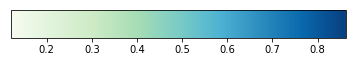

In [40]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=min(all_range_idhm_brasil), vmax=max(all_range_idhm_brasil))

cb1 = mpl.colorbar.ColorbarBase(ax, cmap='GnBu',
                                norm=norm,
                                orientation='horizontal')
fig.savefig(f'../imgs/colorbar_idhm_brasil_GnBu.png')

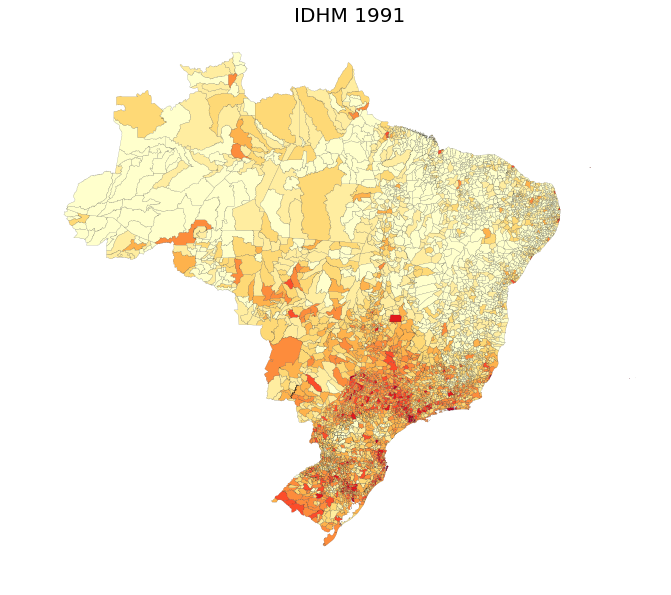

In [71]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'YlOrRd',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IDHM 1991'
    },
    'data_enconded' : custom_1991_br,
    'filename' : 'brasil_idhm_1991'
}
plot_indicator(brasil_idhm, **plot_details)

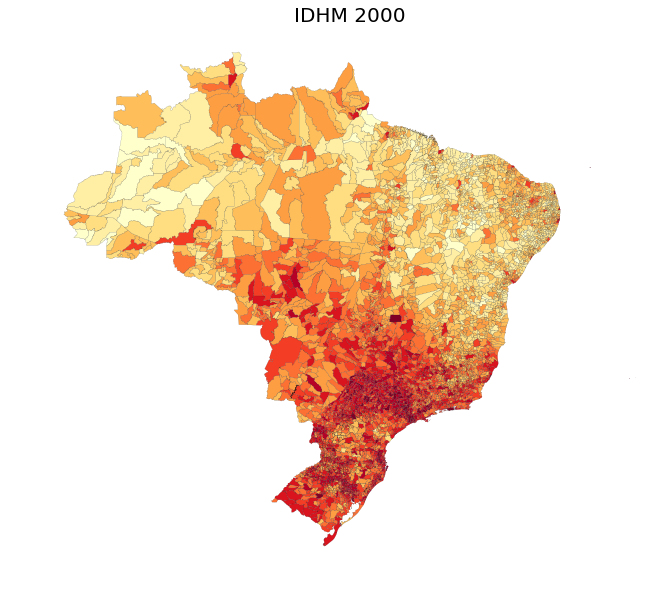

In [72]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'YlOrRd',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IDHM 2000'
    },
    'data_enconded' : custom_2000_br,
    'filename' : 'brasil_idhm_2000'
}
plot_indicator(brasil_idhm, **plot_details)

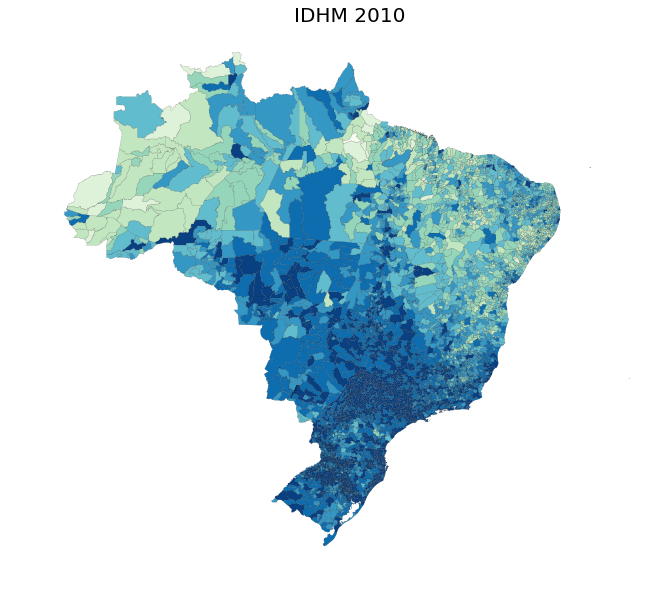

In [159]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IDHM 2010'
    },
    'data_enconded' : custom_2010_br,
    'filename' : 'brasil_idhm_2010_GnBu'
}
plot_indicator(brasil_idhm, **plot_details)

# ÍNDICE FIRJAN DE DESENVOLVIMENTO MUNICIPAL

## EMPREGO E RENDA

In [41]:
ifdm_er_2010_2016 = pd.read_excel("../data/firjan/IFDM EmpregoRenda - 2005 a 2016.xlsx",
                             sheet_name='2010-2016', dtype={'Código' : int})

In [42]:
ifdm_er_2010_2016.head()

Código Região  UF              Município Nota_2016 Ranking_2016 Nota_2010  \
0  110001  Norte  RO  Alta Floresta D'Oeste  0.407323         3745  0.541543   
1  110002  Norte  RO              Ariquemes  0.612716          712  0.732535   
2  110003  Norte  RO                 Cabixi  0.336325         4720  0.438219   
3  110004  Norte  RO                 Cacoal  0.577314         1013  0.739906   
4  110005  Norte  RO             Cerejeiras   0.52984         1500  0.591041   

  Ranking_2010  
0         2502  
1          662  
2         4365  
3          632  
4         1801

In [43]:
ifdm_er_2010_2016 = ifdm_er_2010_2016.replace("*", np.nan)

In [44]:
ifdm_er_2010_2016.head()

Código Região  UF              Município  Nota_2016  Ranking_2016  \
0  110001  Norte  RO  Alta Floresta D'Oeste   0.407323        3745.0   
1  110002  Norte  RO              Ariquemes   0.612716         712.0   
2  110003  Norte  RO                 Cabixi   0.336325        4720.0   
3  110004  Norte  RO                 Cacoal   0.577314        1013.0   
4  110005  Norte  RO             Cerejeiras   0.529840        1500.0   

   Nota_2010  Ranking_2010  
0   0.541543        2502.0  
1   0.732535         662.0  
2   0.438219        4365.0  
3   0.739906         632.0  
4   0.591041        1801.0

## A COLUNA Código dos dados da FIRJAN não é o mesmo código de município do IBGE

In [45]:
brasil_ifdm_firjan_economico = mapa.merge(ifdm_er_2010_2016, how='left', left_on=['NOME', 'UF'], right_on=['Município', 'UF']).copy()

In [46]:
brasil_ifdm_firjan_economico.shape

(5807, 17)

In [47]:
brasil_ifdm_firjan_economico[brasil_ifdm_firjan_economico['Código'].isnull()]

GEOCODIGO                   NOME  UF  ID_UF    REGIAO  \
2140    4212809     Balneário Piçarras  SC     42       Sul   
3368    3147808            Passa-Vinte  MG     31   Sudeste   
4383    3131802             Itabirinha  MG     31   Sudeste   
5458    2515401                 Seridó  PB     25  Nordeste   
5623    2412559  São Miguel do Gostoso  RN     24  Nordeste   

                 MESOREGIAO                 MICROREGIA LATITUDE LONGITUDE  \
2140         VALE DO ITAJAI                     ITAJAI  -26.764   -48.672   
3368  SUL/SUDOESTE DE MINAS                ANDRELANDIA  -22.209   -44.234   
4383       VALE DO RIO DOCE                    MANTENA  -18.566   -41.233   
5458              BORBOREMA  SERIDO ORIENTAL PARAIBANO   -6.934   -36.402   
5623         LESTE POTIGUAR           LITORAL NORDESTE   -5.125   -35.639   

                                               geometry  Código Região  \
2140  POLYGON ((-48.81703211999999 -26.740341, -48.8...     NaN    NaN   
3368  POLYGON ((-44.35982603999999 -22.252185, -44.3...     NaN    NaN   
4383  POLYGON ((-41.31930887999999 -18.50536701, -41...     NaN    NaN   
5458  POLYGON ((-36.55982088 -6.840370979999999, -36...     NaN    NaN   
5623  POLYGON ((-35.83802916 -5.22870102, -35.831536...     NaN    NaN   

     Município  Nota_2016  Ranking_2016  Nota_2010  Ranking_2010  
2140       NaN        NaN           NaN        NaN           NaN  
3368       NaN        NaN           NaN        NaN           NaN  
4383       NaN        NaN           NaN        NaN           NaN  
5458       NaN        NaN           NaN        NaN           NaN  
5623       NaN        NaN           NaN        NaN           NaN

In [50]:
brasil_ifdm_firjan_economico = mapa.merge(ifdm_er_2010_2016, how='inner', left_on=['NOME', 'UF'], right_on=['Município', 'UF']).copy()

In [53]:
brasil_ifdm_firjan_economico.shape

(5802, 17)

In [54]:
brasil_ifdm_firjan_economico.head()

GEOCODIGO              NOME  UF  ID_UF REGIAO           MESOREGIAO  \
0    1200336       Mâncio Lima  AC     12  Norte        VALE DO JURUA   
1    1300201  Atalaia do Norte  AM     13  Norte  SUDOESTE AMAZONENSE   
2    1301654           Guajará  AM     13  Norte  SUDOESTE AMAZONENSE   
3    1200427   Rodrigues Alves  AC     12  Norte        VALE DO JURUA   
4    1200203   Cruzeiro do Sul  AC     12  Norte        VALE DO JURUA   

        MICROREGIA LATITUDE LONGITUDE  \
0  CRUZEIRO DO SUL   -7.614   -72.896   
1    ALTO SOLIMOES   -4.372   -70.192   
2            JURUA   -7.546   -72.584   
3  CRUZEIRO DO SUL   -7.742   -72.647   
4  CRUZEIRO DO SUL   -7.631    -72.67   

                                            geometry  Código Região  \
0  POLYGON ((-73.80098316 -7.111458, -73.73762495...  120033  Norte   
1  POLYGON ((-73.80098316 -7.111458, -73.79617103...  130020  Norte   
2  POLYGON ((-73.73762495999999 -7.13431700999999...  130165  Norte   
3  POLYGON ((-73.69157987999999 -7.76778101999999...  120042  Norte   
4  POLYGON ((-73.62958103999999 -8.05086, -73.423...  120020  Norte   

          Município  Nota_2016  Ranking_2016  Nota_2010  Ranking_2010  
0       Mâncio Lima   0.237680        5403.0   0.421730        4609.0  
1  Atalaia do Norte   0.389476        4041.0   0.279963        5430.0  
2           Guajará   0.312241        4971.0   0.467693        3799.0  
3   Rodrigues Alves   0.279019        5204.0   0.454898        4068.0  
4   Cruzeiro do Sul   0.433207        3224.0   0.557801        2252.0

In [55]:
brasil_ifdm_firjan_economico['Nota_2016'] = brasil_ifdm_firjan_economico['Nota_2016'].astype(float)
brasil_ifdm_firjan_economico['Nota_2010'] = brasil_ifdm_firjan_economico['Nota_2010'].astype(float)

In [56]:
#a determinação de quantiles é afetada por valores nulos (np.nan)
brasil_ifdm_firjan_economico = brasil_ifdm_firjan_economico.dropna()

In [57]:
all_range_firjan_economico_brasil=list(itertools.chain(brasil_ifdm_firjan_economico['Nota_2016'].tolist(), brasil_ifdm_firjan_economico['Nota_2010'].tolist()))

In [58]:
len(all_range_firjan_economico_brasil)

11308

In [59]:
min(all_range_firjan_economico_brasil), max(all_range_firjan_economico_brasil)

(0.15665606871809068, 0.937991429376339)

In [60]:
brasil_ifdm_firjan_economico[brasil_ifdm_firjan_economico['Nota_2016'] > .715].shape

(175, 17)

In [61]:
brasil_ifdm_firjan_economico[brasil_ifdm_firjan_economico['Nota_2016'].isnull()].shape

(0, 17)

In [62]:
quantiles_brasil_ifdm = mc.Quantiles(all_range_firjan_economico_brasil, k=10)
quantiles_brasil_ifdm

               Quantiles                
 
Lower          Upper               Count
        x[i] <= 0.345               1131
0.345 < x[i] <= 0.400               1131
0.400 < x[i] <= 0.434               1134
0.434 < x[i] <= 0.463               1127
0.463 < x[i] <= 0.493               1131
0.493 < x[i] <= 0.526               1131
0.526 < x[i] <= 0.569               1130
0.569 < x[i] <= 0.623               1131
0.623 < x[i] <= 0.701               1131
0.701 < x[i] <= 0.938               1131

In [63]:
custom_2010_ifdm_br = mc.User_Defined(brasil_ifdm_firjan_economico['Nota_2010'], bins=quantiles_brasil_ifdm.bins)
custom_2016_ifdm_br = mc.User_Defined(brasil_ifdm_firjan_economico['Nota_2016'], bins=quantiles_brasil_ifdm.bins)

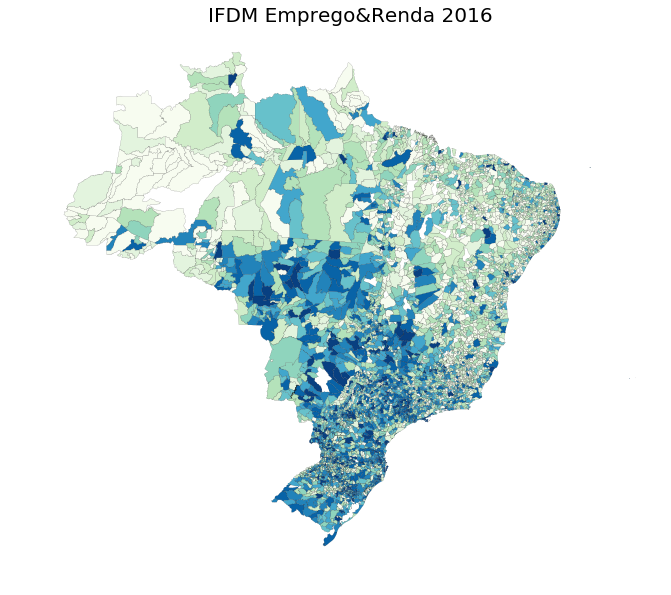

In [64]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda 2016'
    },
    'data_enconded' : custom_2016_ifdm_br,
    'filename' : 'brasil_ifdm_2016_GnBu'
}
plot_indicator(brasil_ifdm_firjan_economico, **plot_details)

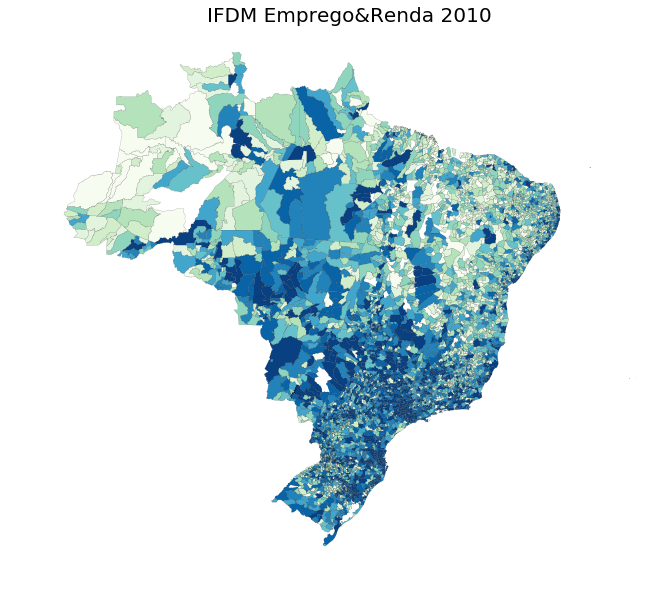

In [214]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda 2010'
    },
    'data_enconded' : custom_2010_ifdm_br,
    'filename' : 'brasil_ifdm_2010_GnBu'
}
plot_indicator(brasil_ifdm_firjan_economico, **plot_details)

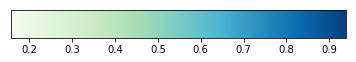

In [215]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=min(all_range_firjan_economico_brasil), vmax=max(all_range_firjan_economico_brasil))

cb1 = mpl.colorbar.ColorbarBase(ax, cmap='GnBu',
                                norm=norm,
                                orientation='horizontal')
fig.savefig(f'../imgs/colorbar_ifdm_brasil.png')

## IFDM & SEMIÁRIDO

In [65]:
semiarido_ifdm = gis_semiarido.merge(ifdm_er_2010_2016, how='inner', left_on=['NOME', 'UF'], right_on=['Município', 'UF']).copy()

In [66]:
semiarido_ifdm = semiarido_ifdm.dropna()

In [67]:
semiarido_ifdm.head()

GEOCODIGO                  NOME  UF  ID_UF    REGIAO            MESOREGIAO  \
0    2911105  Formosa do Rio Preto  BA     29  Nordeste  EXTREMO OESTE BAIANO   
1    2903201             Barreiras  BA     29  Nordeste  EXTREMO OESTE BAIANO   
2    2908101                 Cocos  BA     29  Nordeste  EXTREMO OESTE BAIANO   
3    3157609     Santa Fé de Minas  MG     31   Sudeste        NORTE DE MINAS   
4    2926202     Riachão das Neves  BA     29  Nordeste  EXTREMO OESTE BAIANO   

               MICROREGIA LATITUDE LONGITUDE  \
0               BARREIRAS  -11.048   -45.193   
1               BARREIRAS  -12.153    -44.99   
2  SANTA MARIA DA VITORIA  -14.184   -44.534   
3                PIRAPORA   -16.69   -45.414   
4               BARREIRAS  -11.746    -44.91   

                                            geometry  Código    Região  \
0  POLYGON ((-46.60920792 -11.25549999, -46.58163...  291110  Nordeste   
1  POLYGON ((-46.337472 -11.81600496, -46.3311928...  290320  Nordeste   
2  POLYGON ((-45.97449588 -15.00714099, -45.97809...  290810  Nordeste   
3  POLYGON ((-45.90996516 -16.53031701, -45.89120...  315760   Sudeste   
4  POLYGON ((-46.06663284 -11.61865197, -45.88338...  292620  Nordeste   

              Município  Nota_2016  Ranking_2016  Nota_2010  Ranking_2010  
0  Formosa do Rio Preto   0.491052        2072.0   0.620674        1487.0  
1             Barreiras   0.664836         360.0   0.836201         176.0  
2                 Cocos   0.617502         673.0   0.577295        1977.0  
3     Santa Fé de Minas   0.457930        2683.0   0.541390        2506.0  
4     Riachão das Neves   0.481648        2217.0   0.576457        1986.0

In [68]:
semiarido_ifdm.shape

(1220, 17)

In [69]:
semiarido_ifdm['NOME'].nunique()

1195

In [70]:
semiarido_firjan_economico_brasil=list(itertools.chain(semiarido_ifdm['Nota_2016'].tolist(), semiarido_ifdm['Nota_2010'].tolist()))

In [71]:
len(semiarido_firjan_economico_brasil)

2440

In [72]:
quantiles_semiarido_ifdm = mc.Quantiles(semiarido_firjan_economico_brasil, k=10)
quantiles_semiarido_ifdm

               Quantiles               
 
Lower          Upper              Count
        x[i] <= 0.309               244
0.309 < x[i] <= 0.360               244
0.360 < x[i] <= 0.399               244
0.399 < x[i] <= 0.418               244
0.418 < x[i] <= 0.436               244
0.436 < x[i] <= 0.452               244
0.452 < x[i] <= 0.471               244
0.471 < x[i] <= 0.497               244
0.497 < x[i] <= 0.546               244
0.546 < x[i] <= 0.908               244

In [73]:
custom_2010_ifdm_semiarido = mc.User_Defined(semiarido_ifdm['Nota_2010'], bins=quantiles_semiarido_ifdm.bins)
custom_2016_ifdm_semiarido = mc.User_Defined(semiarido_ifdm['Nota_2016'], bins=quantiles_semiarido_ifdm.bins)

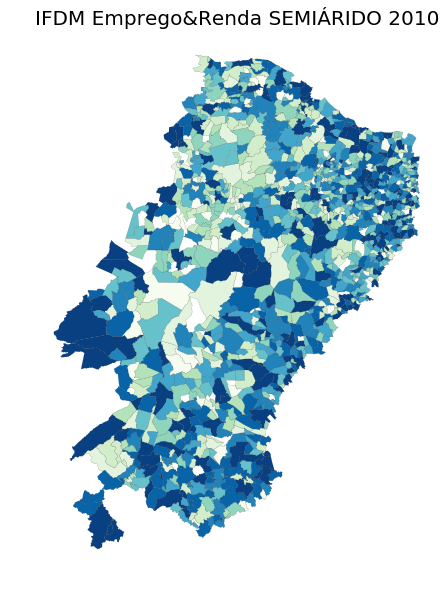

In [236]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda SEMIÁRIDO 2010'
    },
    'data_enconded' : custom_2010_ifdm_semiarido,
    'filename' : 'semiarido_ifdm_2010_GnBu'
}
plot_indicator(semiarido_ifdm, **plot_details)

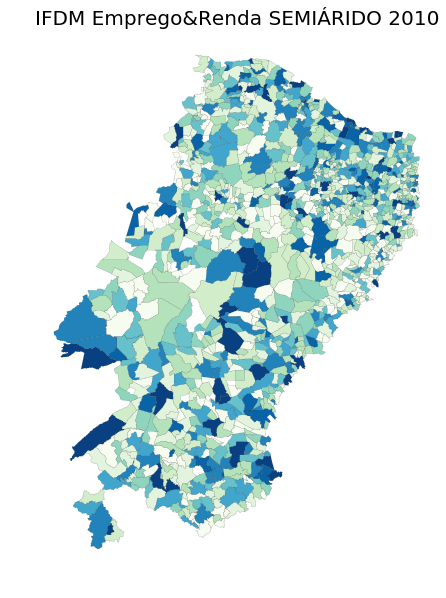

In [237]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda SEMIÁRIDO 2010'
    },
    'data_enconded' : custom_2016_ifdm_semiarido ,
    'filename' : 'semiarido_ifdm_2016_GnBu'
}
plot_indicator(semiarido_ifdm, **plot_details)

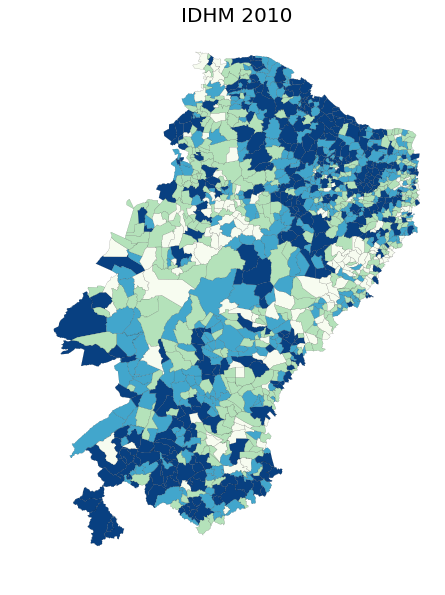

In [248]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .1,
        'edgecolor' : 'black',
        'title_text' : 'IDHM 2010'
    },
    'data_enconded' : custom_2010,
    'filename' : 'semiarido_idhm_2010_GnBu'
}
plot_indicator(gis_merge, **plot_details)

In [251]:
semiarido_ifdm.columns

Index(['GEOCODIGO', 'NOME', 'UF', 'ID_UF', 'REGIAO', 'MESOREGIAO',
       'MICROREGIA', 'LATITUDE', 'LONGITUDE', 'geometry', 'Código', 'Região',
       'Município', 'Nota_2016', 'Ranking_2016', 'Nota_2010', 'Ranking_2010'],
      dtype='object')

In [74]:
# SELECIONAR OS MUNICIPIOS DO PRIMEIRO QUANTIL (Q1)
q1_semiarido_ifdm = semiarido_ifdm[semiarido_ifdm['Nota_2010'] <= semiarido_ifdm['Nota_2010'].quantile(.25)].copy()

In [75]:
q1_semiarido_ifdm['Nota_2010'] = q1_semiarido_ifdm['Nota_2010'].astype(float)
q1_semiarido_ifdm['Nota_2016'] = q1_semiarido_ifdm['Nota_2016'].astype(float)

In [76]:
#número de municipios no primeiro quartil
q1_semiarido_ifdm.shape[0]

305

In [77]:
q1_semiarido_firjan_economico_brasil=list(itertools.chain(q1_semiarido_ifdm['Nota_2016'].tolist(), q1_semiarido_ifdm['Nota_2010'].tolist()))
q1_quantiles_semiarido_ifdm = mc.Quantiles(q1_semiarido_firjan_economico_brasil, k=10)
q1_quantiles_semiarido_ifdm 

              Quantiles               
 
Lower          Upper             Count
        x[i] <= 0.267               61
0.267 < x[i] <= 0.308               61
0.308 < x[i] <= 0.338               61
0.338 < x[i] <= 0.360               61
0.360 < x[i] <= 0.385               61
0.385 < x[i] <= 0.396               61
0.396 < x[i] <= 0.406               61
0.406 < x[i] <= 0.414               61
0.414 < x[i] <= 0.441               61
0.441 < x[i] <= 0.714               61

In [78]:
q1_custom_2010_ifdm_semiarido = mc.User_Defined(q1_semiarido_ifdm['Nota_2010'], bins=q1_quantiles_semiarido_ifdm.bins)
q1_custom_2016_ifdm_semiarido = mc.User_Defined(q1_semiarido_ifdm['Nota_2016'], bins=q1_quantiles_semiarido_ifdm.bins)

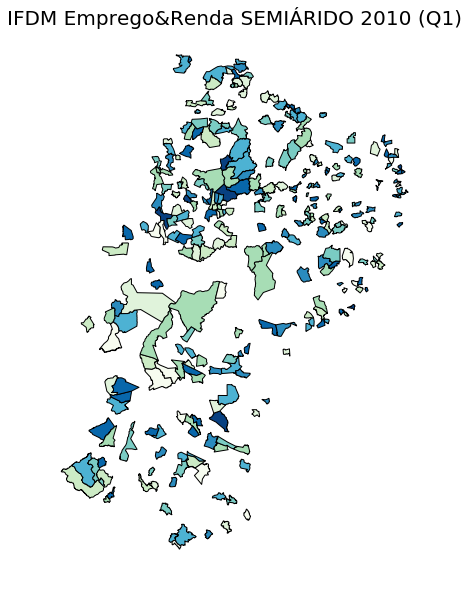

In [270]:
plot_details = {
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : 1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda SEMIÁRIDO 2010 (Q1)'
    },
    'data_enconded' : q1_custom_2010_ifdm_semiarido,
    'filename' : 'q1_semiarido_ifdm_2010_GnBu'
}
plot_indicator(q1_semiarido_ifdm, **plot_details)

In [79]:
q1_inf_semiarido = semiarido_ifdm[semiarido_ifdm['Nota_2010'] <= semiarido_ifdm['Nota_2010'].quantile(.25)].copy()

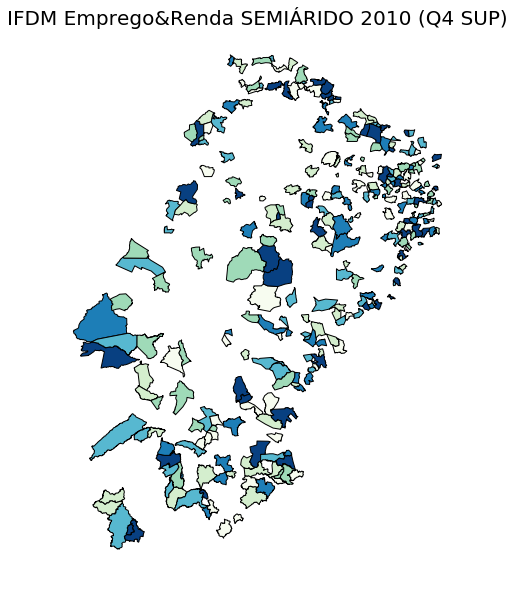

In [82]:
plot_details = {
    'indicador' : 'Nota_2010',
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : 1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda SEMIÁRIDO 2010 (Q4 SUP)'
    },
    'filename' : 'q4_sup_semiarido_ifdm_2010_GnBu'
}
q3_sup_semarido = select_quantile_and_plot(semiarido_ifdm, .75, smaller_and_equal=False, **plot_details)

# SPATIAL JOIN

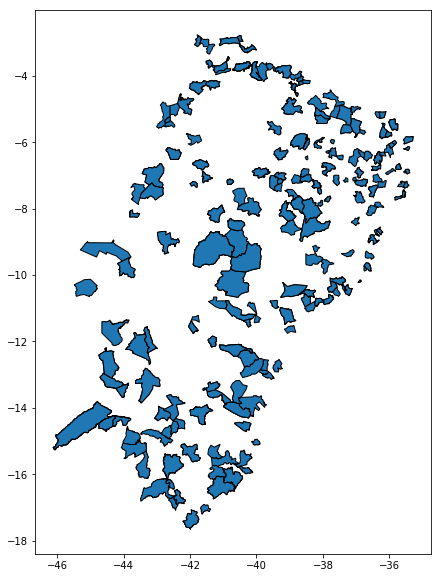

In [83]:
gpd.sjoin(q3_sup_semarido, q1_inf_semiarido, how='inner', op='intersects').plot(figsize=(20,10), linewidth= 1, edgecolor='black')

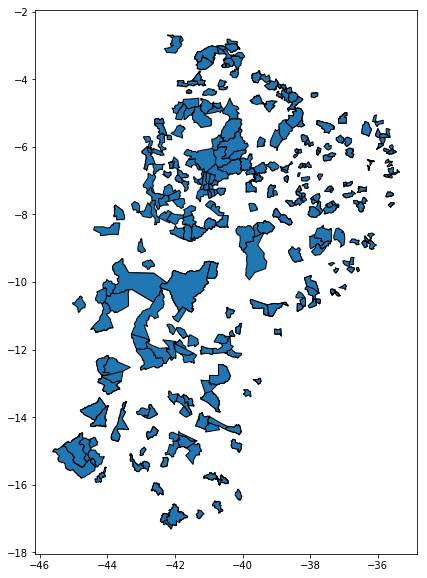

In [84]:
gpd.sjoin(q3_sup_semarido, q1_inf_semiarido, how='right', op='intersects').plot(figsize=(20,10), linewidth= 1, edgecolor='black')

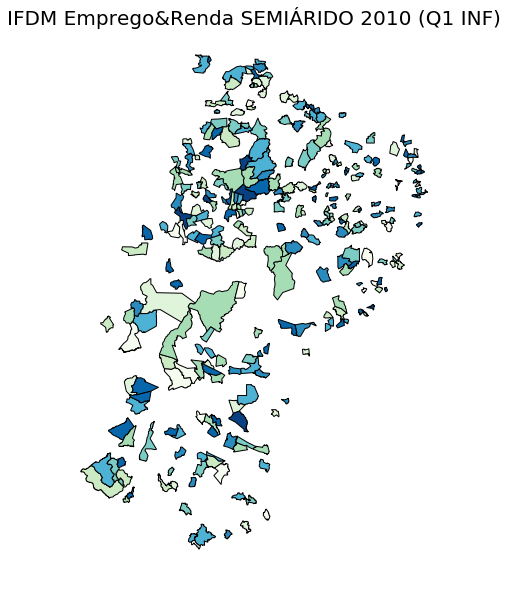

In [85]:
plot_details = {
    'indicador' : 'Nota_2010',
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : 1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda SEMIÁRIDO 2010 (Q1 INF)'
    },
    'filename' : 'q1_inf_semiarido_ifdm_2010_GnBu'
}
q1_inf_semiarido_ifdm = select_quantile_and_plot(semiarido_ifdm, .25, smaller_and_equal=True, **plot_details)

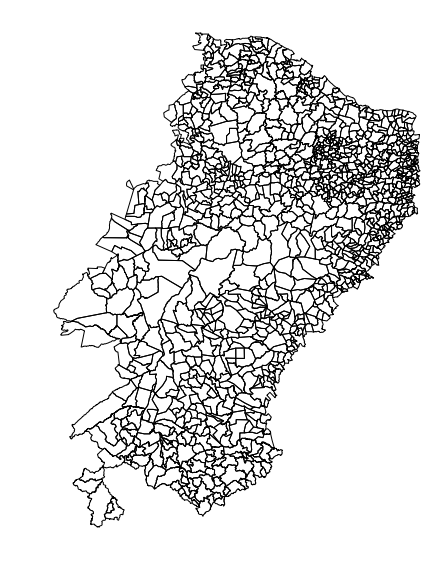

In [86]:
ax = gis_semiarido.dropna().plot(figsize=(15,10),facecolor='none', edgecolor='black')
ax.set_axis_off()
plt.savefig("../imgs/esqueleto.png", transparent=True)

In [88]:
raster = rasterio.open("../imgs/q1_inf_semiarido_ifdm_2010_GnBu.png")

z:\eda\seme\venv\lib\site-packages\rasterio\__init__.py:223: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


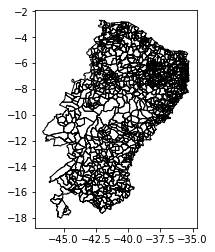

In [89]:
gis_semiarido.plot(facecolor='none', edgecolor='black')

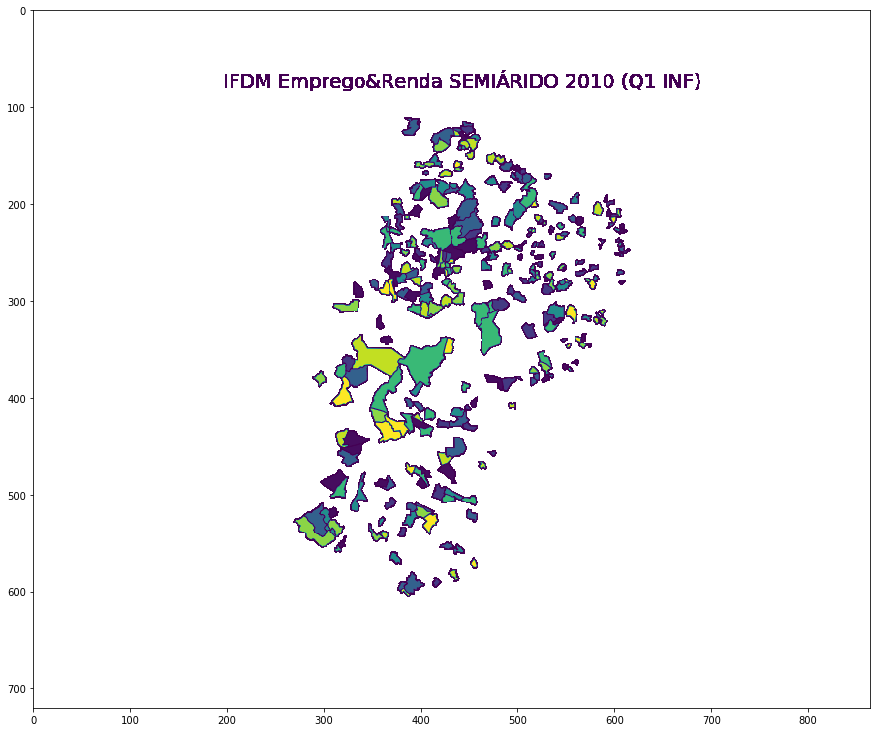

In [90]:
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax);

In [404]:
semiarido_ifdm.shape

(1220, 17)

In [91]:
semiarido_ifdm['colors'] = np.zeros(len(semiarido_ifdm))

In [92]:
semiarido_ifdm = semiarido_ifdm.dropna()

In [93]:
semiarido_ifdm.dtypes

GEOCODIGO         int64
NOME             object
UF               object
ID_UF             int64
REGIAO           object
MESOREGIAO       object
MICROREGIA       object
LATITUDE         object
LONGITUDE        object
geometry         object
Código            int64
Região           object
Município        object
Nota_2016       float64
Ranking_2016    float64
Nota_2010       float64
Ranking_2010    float64
colors          float64
dtype: object

In [94]:
q1_inf_semiarido_ifdm.columns

Index(['GEOCODIGO', 'NOME', 'UF', 'ID_UF', 'REGIAO', 'MESOREGIAO',
       'MICROREGIA', 'LATITUDE', 'LONGITUDE', 'geometry', 'Código', 'Região',
       'Município', 'Nota_2016', 'Ranking_2016', 'Nota_2010', 'Ranking_2010',
       'cl'],
      dtype='object')

In [96]:
q1_inf_semiarido_ifdm = q1_inf_semiarido_ifdm.dropna()
q3_sup_semarido_ifdm = q3_sup_semarido.dropna()

In [98]:
q1_inf_semiarido_ifdm['PK'] = q1_inf_semiarido_ifdm.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')
q3_sup_semarido_ifdm['PK'] = q3_sup_semarido_ifdm.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')

In [106]:
semiarido_ifdm['PK'] = semiarido_ifdm.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')

In [107]:
semiarido_ifdm.dtypes

GEOCODIGO         int64
NOME             object
UF               object
ID_UF             int64
REGIAO           object
MESOREGIAO       object
MICROREGIA       object
LATITUDE         object
LONGITUDE        object
geometry         object
Código            int64
Região           object
Município        object
Nota_2016       float64
Ranking_2016    float64
Nota_2010       float64
Ranking_2010    float64
colors          float64
PK               object
dtype: object

In [101]:
q1_inf_semiarido_ifdm_codes = q1_inf_semiarido_ifdm['PK'].unique().tolist()
q3_sup_semiarido_ifdm_codes = q3_sup_semarido_ifdm['PK'].unique().tolist()

In [102]:
semiarido_ifdm.set_index('PK', inplace=True)
q1_inf_semiarido_ifdm.set_index('PK', inplace=True)
q3_sup_semarido_ifdm.set_index('PK', inplace=True)

In [103]:
for geocod_inf, geocod_sup in zip(q1_inf_semiarido_ifdm_codes, q3_sup_semiarido_ifdm_codes):
    semiarido_ifdm.loc[geocod_inf, 'colors'] = .5
    semiarido_ifdm.loc[geocod_sup, 'colors'] = 1.0

In [104]:
semiarido_ifdm['colors'].unique()

array([1. , 0.5, 0. ])

In [108]:
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0,  'white'), (.5, 'indianred'), (1.0, 'steelblue')])

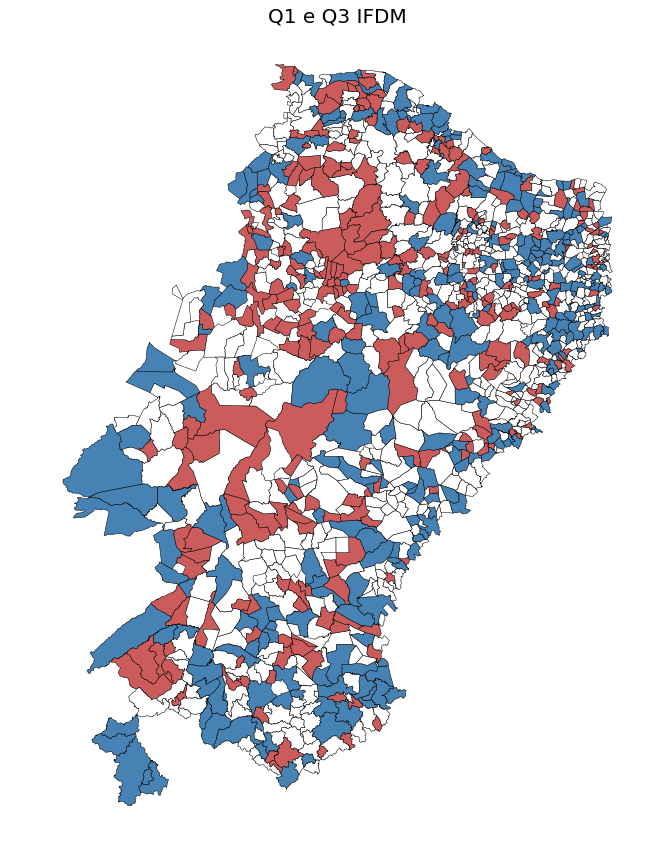

In [109]:
fig, ax = plt.subplots(figsize=(15, 15))
semiarido_ifdm.plot(column='colors', cmap=cmap, figsize=(20,10), edgecolor='black', linewidth=.5, ax=ax)
ax.set_axis_off()
ax.set_title("Q1 e Q3 IFDM", size=20)
plt.savefig("../imgs/q1_q3_semiarido_ifdm.png", transparent=True)

In [110]:
reset_semiarido_ifdm = semiarido_ifdm.copy()
reset_semiarido_ifdm['colors'] = np.zeros(len(semiarido_ifdm))

In [111]:
for geocod_inf in q1_inf_semiarido_ifdm_codes:
    reset_semiarido_ifdm.loc[geocod_inf, 'colors'] = 1.0

In [112]:
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0,  'w'), (1.0, 'indianred')])

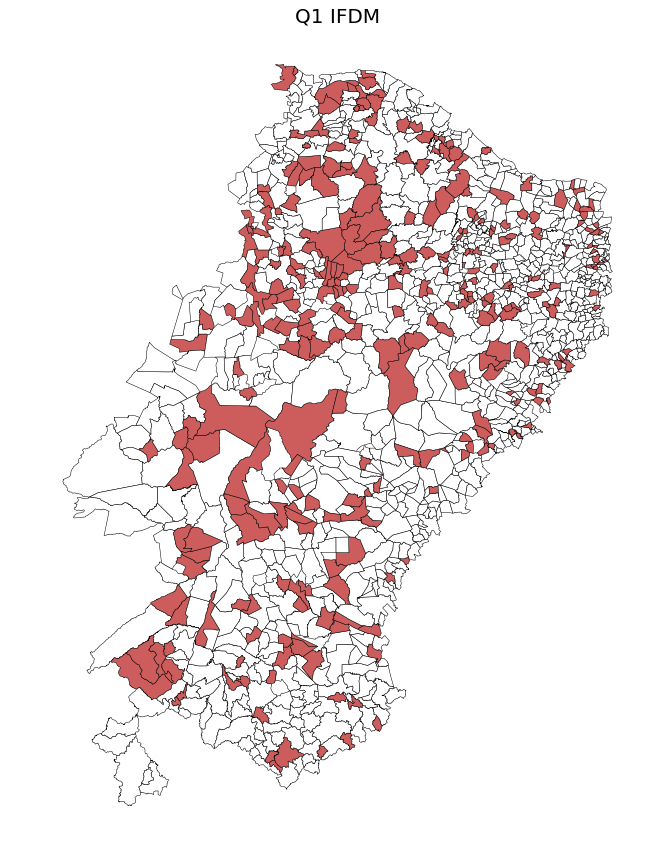

In [113]:
fig, ax = plt.subplots(figsize=(15, 15))
reset_semiarido_ifdm.plot(column='colors', cmap=cmap, figsize=(20,10), edgecolor='black', linewidth=.5, ax=ax)
ax.set_axis_off()
ax.set_title("Q1 IFDM", size=20)
plt.savefig("../imgs/q1_semiarido_ifdm.png", transparent=True)

In [114]:
qsup_reset_semiarido_ifdm = semiarido_ifdm.copy()
qsup_reset_semiarido_ifdm['colors'] = np.zeros(len(semiarido_ifdm))

In [116]:
for geocod in q3_sup_semiarido_ifdm_codes:
    qsup_reset_semiarido_ifdm.loc[geocod, 'colors'] = 1.0

In [117]:
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0,  'w'), (1.0, 'steelblue')])

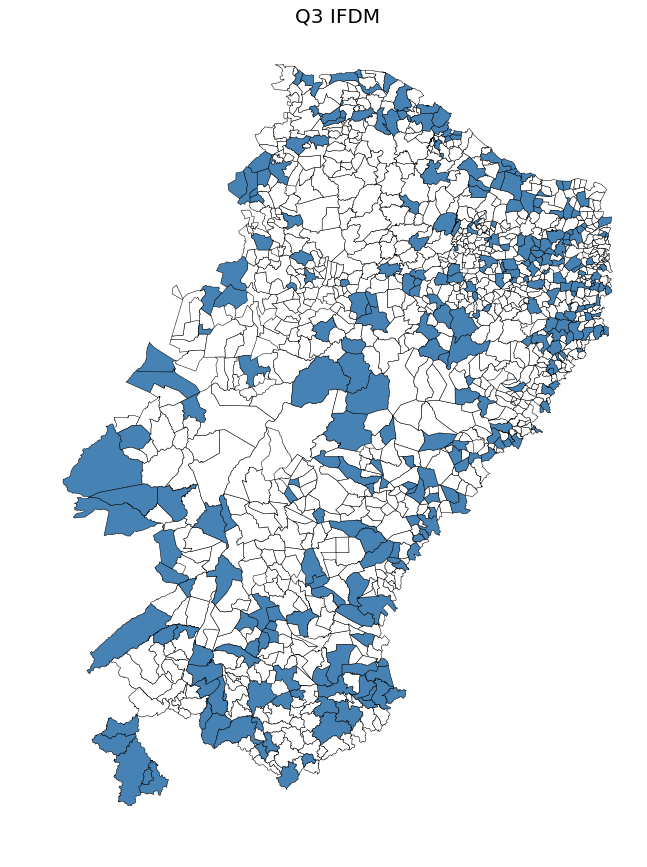

In [118]:
fig, ax = plt.subplots(figsize=(15, 15))
qsup_reset_semiarido_ifdm.plot(column='colors', cmap=cmap, figsize=(20,10), edgecolor='black', linewidth=.5, ax=ax)
ax.set_axis_off()
ax.set_title("Q3 IFDM", size=20)
plt.savefig("../imgs/q3_semiarido_ifdm.png", transparent=True)

### SPATIAL JOIN

In [ ]:
#gpd.sjoin(q4_sup_semarido, q1_inf_semiarido, how='right', op='intersects').plot(figsize=(20,10), linewidth= 1, edgecolor='black')

In [119]:
q1_inf_semiarido.shape, q3_sup_semarido.shape

((305, 17), (305, 18))

In [123]:
q1_inf_semiarido_to_join = q1_inf_semiarido.copy()
q1_inf_semiarido_to_join['PK'] = q1_inf_semiarido_to_join.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')
q3_sup_semiarido_to_join = q3_sup_semarido.copy()
q3_sup_semiarido_to_join['PK'] = q3_sup_semiarido_to_join.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')

In [124]:
q1_inf_semiarido_to_join.set_index('PK', inplace=True)
q3_sup_semiarido_to_join.set_index('PK', inplace=True)

In [125]:
sjoin_q1_q3 = gpd.sjoin(q1_inf_semiarido_to_join, q3_sup_semiarido_to_join, how='left', op='intersects').copy()

In [126]:
sjoin_q1_q3 = sjoin_q1_q3.dropna()

In [128]:
sjoin_q1_q3['colors'] = np.zeros(len(sjoin_q1_q3))

In [130]:
len(set(sjoin_q1_q3.index).intersection(set(q3_sup_semiarido_ifdm_codes)))

0

In [131]:
len(set(sjoin_q1_q3.index).intersection(set(q1_inf_semiarido_ifdm_codes)))

221

In [132]:
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0,  'lightcoral'), (1.0, 'steelblue')])

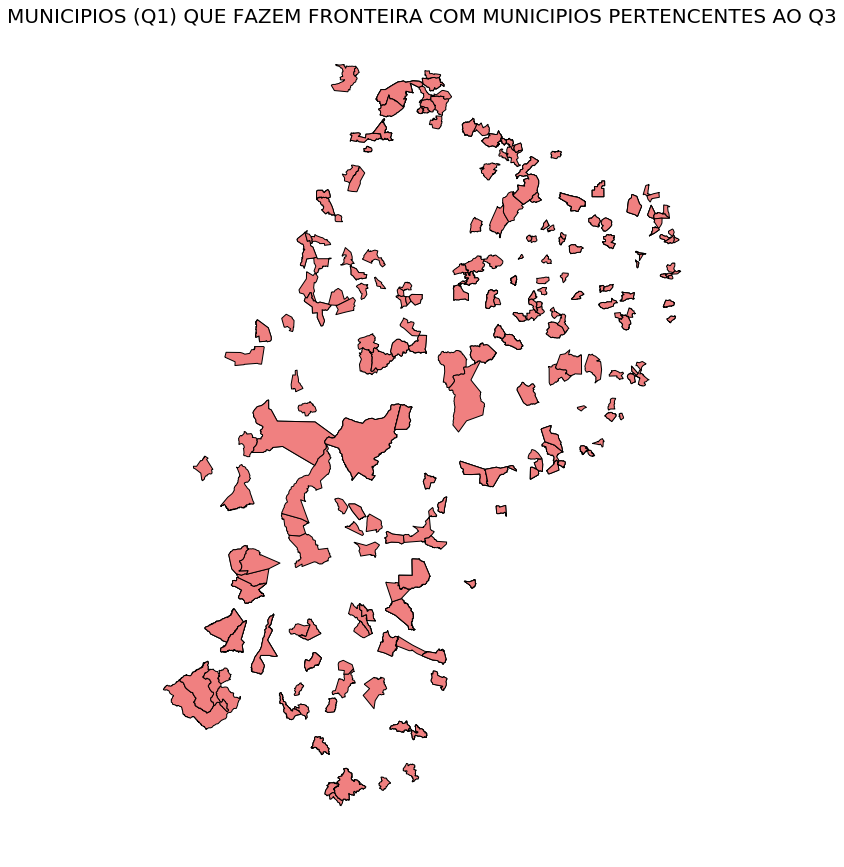

In [133]:
fig, ax = plt.subplots(figsize=(15, 15))
sjoin_q1_q3.plot(column='colors', cmap=cmap, figsize=(20,10), edgecolor='black', linewidth=1, ax=ax)
ax.set_axis_off()
ax.set_title("MUNICIPIOS (Q1) QUE FAZEM FRONTEIRA COM MUNICIPIOS PERTENCENTES AO Q3", size=20)
plt.savefig("../imgs/q1_only_fronteira_com_q3_semiarido_ifdm.png", transparent=True);

## PLOTAR APENAS OS MUNICÍPIOS QUE ESTÃO NO Q1 QUE FAZEM FRONTEIRA COM MUNICÍPIOS PERTENCENTES AO Q3

In [135]:
semiarido_ifdm.head(2)

GEOCODIGO                  NOME  UF  ID_UF    REGIAO  \
PK                                                                     
2911105_291110    2911105  Formosa do Rio Preto  BA     29  Nordeste   
2903201_290320    2903201             Barreiras  BA     29  Nordeste   

                          MESOREGIAO MICROREGIA LATITUDE LONGITUDE  \
PK                                                                   
2911105_291110  EXTREMO OESTE BAIANO  BARREIRAS  -11.048   -45.193   
2903201_290320  EXTREMO OESTE BAIANO  BARREIRAS  -12.153    -44.99   

                                                         geometry  Código  \
PK                                                                          
2911105_291110  POLYGON ((-46.60920792 -11.25549999, -46.58163...  291110   
2903201_290320  POLYGON ((-46.337472 -11.81600496, -46.3311928...  290320   

                  Região             Município  Nota_2016  Ranking_2016  \
PK                                                                        
2911105_291110  Nordeste  Formosa do Rio Preto   0.491052        2072.0   
2903201_290320  Nordeste             Barreiras   0.664836         360.0   

                Nota_2010  Ranking_2010  colors              PK  
PK                                                               
2911105_291110   0.620674        1487.0     1.0  2911105_291110  
2903201_290320   0.836201         176.0     1.0  2903201_290320

In [136]:
semiarido_ifdm['colors'] = np.zeros(len(semiarido_ifdm))

In [137]:
municipios_q1_fronteira_q3 = sjoin_q1_q3.index.unique().tolist()

In [138]:
len(municipios_q1_fronteira_q3)

221

In [139]:
semiarido_ifdm.index.nunique(), semiarido_ifdm.index.shape[0]

(1220, 1220)

In [140]:
q3_sup_semarido.index.nunique(), q3_sup_semarido.index.shape[0]

(305, 305)

In [141]:
for geocod_inf, geocod_sup in zip(municipios_q1_fronteira_q3, q3_sup_semiarido_to_join.index.unique().tolist()):
    semiarido_ifdm.loc[geocod_inf, 'colors'] = .5
    semiarido_ifdm.loc[geocod_sup, 'colors'] = 1.0

In [142]:
outros_index_q3 = semiarido_ifdm[(semiarido_ifdm['colors'] == 0) & 
               (semiarido_ifdm['Nota_2010'] >= semiarido_ifdm['Nota_2010'].quantile(.75))].index.tolist()

In [143]:
for geocod in outros_index_q3:
    semiarido_ifdm.loc[geocod, 'colors'] = 1.0

In [144]:
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0,  'white'), (.5, 'lightcoral'), (1.0, 'lightblue')])

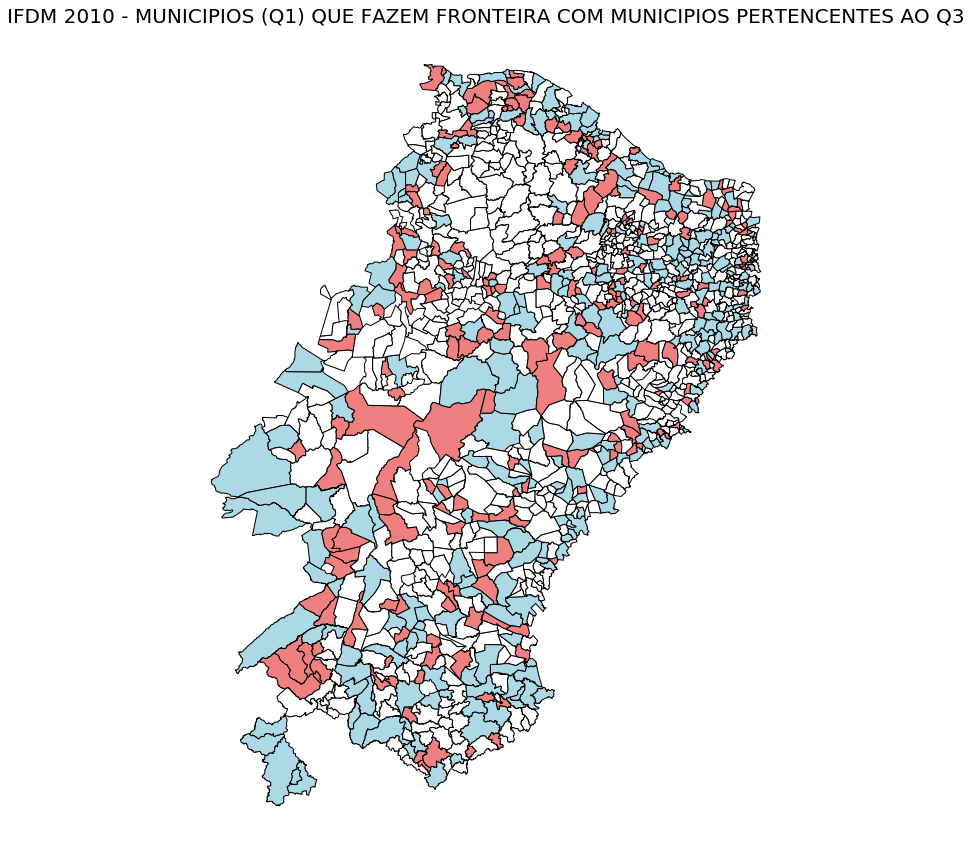

In [145]:
fig, ax = plt.subplots(figsize=(15, 15))
semiarido_ifdm.plot(column='colors', cmap=cmap, figsize=(20,10), edgecolor='black', linewidth=1, ax=ax)
ax.set_axis_off()
ax.set_title("IFDM 2010 - MUNICIPIOS (Q1) QUE FAZEM FRONTEIRA COM MUNICIPIOS PERTENCENTES AO Q3", size=20)
plt.savefig("../imgs/q1_fronteira_com_q3_semiarido_ifdm.png", transparent=True);

## PLOTAR MAPA BRASIL COM MUNICIPÍOS QUE ESTÃO NO Q1 DO IFDM QUE FAZEM FRONTEIRA COM AQUELES PERTENCENTES AO Q3

In [194]:
brasil_fronteira = brasil_ifdm_firjan_economico.copy()

In [195]:
brasil_fronteira.head()

GEOCODIGO              NOME  UF  ID_UF REGIAO           MESOREGIAO  \
0    1200336       Mâncio Lima  AC     12  Norte        VALE DO JURUA   
1    1300201  Atalaia do Norte  AM     13  Norte  SUDOESTE AMAZONENSE   
2    1301654           Guajará  AM     13  Norte  SUDOESTE AMAZONENSE   
3    1200427   Rodrigues Alves  AC     12  Norte        VALE DO JURUA   
4    1200203   Cruzeiro do Sul  AC     12  Norte        VALE DO JURUA   

        MICROREGIA LATITUDE LONGITUDE  \
0  CRUZEIRO DO SUL   -7.614   -72.896   
1    ALTO SOLIMOES   -4.372   -70.192   
2            JURUA   -7.546   -72.584   
3  CRUZEIRO DO SUL   -7.742   -72.647   
4  CRUZEIRO DO SUL   -7.631    -72.67   

                                            geometry  Código Região  \
0  POLYGON ((-73.80098316 -7.111458, -73.73762495...  120033  Norte   
1  POLYGON ((-73.80098316 -7.111458, -73.79617103...  130020  Norte   
2  POLYGON ((-73.73762495999999 -7.13431700999999...  130165  Norte   
3  POLYGON ((-73.69157987999999 -7.76778101999999...  120042  Norte   
4  POLYGON ((-73.62958103999999 -8.05086, -73.423...  120020  Norte   

          Município  Nota_2016  Ranking_2016  Nota_2010  Ranking_2010  
0       Mâncio Lima   0.237680        5403.0   0.421730        4609.0  
1  Atalaia do Norte   0.389476        4041.0   0.279963        5430.0  
2           Guajará   0.312241        4971.0   0.467693        3799.0  
3   Rodrigues Alves   0.279019        5204.0   0.454898        4068.0  
4   Cruzeiro do Sul   0.433207        3224.0   0.557801        2252.0

In [196]:
brasil_fronteira['colors'] = np.zeros(len(brasil_fronteira))

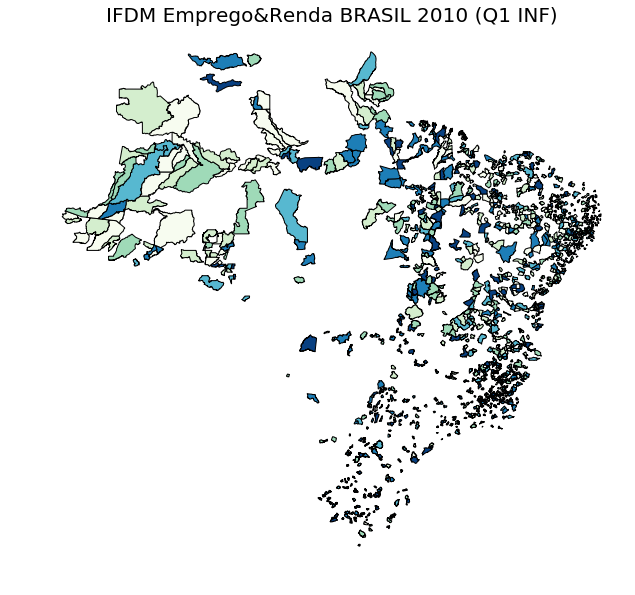

In [197]:
plot_details = {
    'indicador' : 'Nota_2016',
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : 1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda BRASIL 2010 (Q1 INF)'
    },
    'filename' : 'q1_inf_brasil_ifdm_2010_GnBu'
}
q1_inf_brasil_ifdm = select_quantile_and_plot(brasil_fronteira, .25, smaller_and_equal=True, **plot_details)

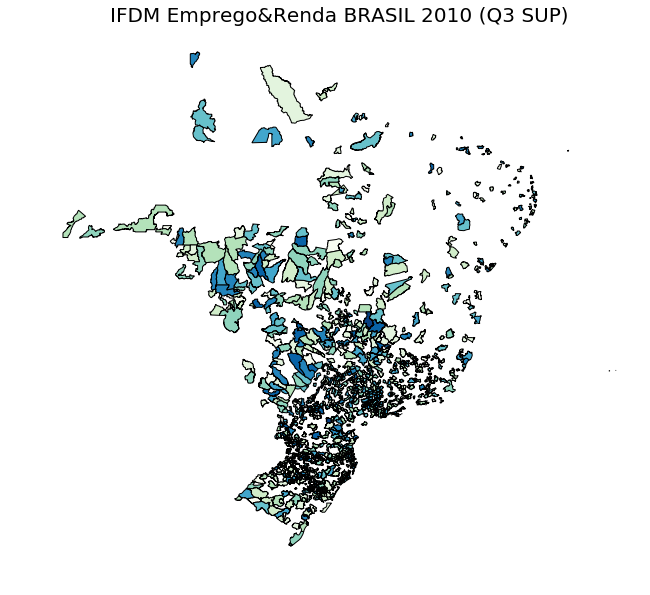

In [198]:
plot_details = {
    'indicador' : 'Nota_2016',
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : 1,
        'edgecolor' : 'black',
        'title_text' : 'IFDM Emprego&Renda BRASIL 2010 (Q3 SUP)'
    },
    'filename' : 'q3_sup_brasil_ifdm_2010_GnBu'
}
q3_sup_brasil_ifdm = select_quantile_and_plot(brasil_fronteira, .75, smaller_and_equal=False, **plot_details)

In [199]:
q1_inf_brasil_ifdm['PK'] = q1_inf_brasil_ifdm.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')
q3_sup_brasil_ifdm['PK'] = q3_sup_brasil_ifdm.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')

In [200]:
q3_sup_brasil_ifdm.head()

GEOCODIGO           NOME  UF  ID_UF REGIAO         MESOREGIAO  \
16    1200344  Manoel Urbano  AC     12  Norte       VALE DO ACRE   
27    1200401     Rio Branco  AC     12  Norte       VALE DO ACRE   
46    1100205    Porto Velho  RO     11  Norte    MADEIRA-GUAPORE   
68    1100023      Ariquemes  RO     11  Norte  LESTE RONDONIENSE   
77    1100262     Rio Crespo  RO     11  Norte  LESTE RONDONIENSE   

        MICROREGIA LATITUDE LONGITUDE  \
16  SENA MADUREIRA   -8.839    -69.26   
27      RIO BRANCO   -9.975    -67.81   
46     PORTO VELHO   -8.762   -63.904   
68       ARIQUEMES   -9.913   -63.041   
77       ARIQUEMES   -9.705     -62.9   

                                             geometry  Código Região  \
16  POLYGON ((-70.62411383999999 -10.074942, -70.6...  120034  Norte   
27  POLYGON ((-68.41816883999999 -9.54472698, -68....  120040  Norte   
46  POLYGON ((-66.80969999999999 -9.81766097999999...  110020  Norte   
68  POLYGON ((-63.10106099999999 -9.75216797999999...  110002  Norte   
77  POLYGON ((-63.07627896 -9.524583, -62.75385791...  110026  Norte   

        Município  Nota_2016  Ranking_2016  Nota_2010  Ranking_2010  colors  \
16  Manoel Urbano   0.608619         740.0   0.384186        5027.0     0.0   
27     Rio Branco   0.648623         472.0   0.872097          77.0     0.0   
46    Porto Velho   0.621901         643.0   0.906546          22.0     0.0   
68      Ariquemes   0.612716         712.0   0.732535         662.0     0.0   
77     Rio Crespo   0.544117        1323.0   0.536506        2582.0     0.0   

    cl              PK  
16   3  1200344_120034  
27   4  1200401_120040  
46   3  1100205_110020  
68   3  1100023_110002  
77   0  1100262_110026

In [201]:
brasil_fronteira['PK'] = brasil_fronteira.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')
brasil_fronteira['PK'] = brasil_fronteira['PK'].astype(str)
#brasil_fronteira.set_index('PK', inplace=True)

In [202]:
brasil_fronteira['PK'].nunique(), len(brasil_fronteira['PK'])

(5424, 5654)

In [208]:
brasil_fronteira = brasil_fronteira.loc[brasil_fronteira['PK'].drop_duplicates().index]

In [209]:
brasil_fronteira.set_index('PK', inplace=True)

In [210]:
brasil_fronteira.head()

GEOCODIGO              NOME  UF  ID_UF REGIAO  \
PK                                                              
1200336_120033    1200336       Mâncio Lima  AC     12  Norte   
1300201_130020    1300201  Atalaia do Norte  AM     13  Norte   
1301654_130165    1301654           Guajará  AM     13  Norte   
1200427_120042    1200427   Rodrigues Alves  AC     12  Norte   
1200203_120020    1200203   Cruzeiro do Sul  AC     12  Norte   

                         MESOREGIAO       MICROREGIA LATITUDE LONGITUDE  \
PK                                                                        
1200336_120033        VALE DO JURUA  CRUZEIRO DO SUL   -7.614   -72.896   
1300201_130020  SUDOESTE AMAZONENSE    ALTO SOLIMOES   -4.372   -70.192   
1301654_130165  SUDOESTE AMAZONENSE            JURUA   -7.546   -72.584   
1200427_120042        VALE DO JURUA  CRUZEIRO DO SUL   -7.742   -72.647   
1200203_120020        VALE DO JURUA  CRUZEIRO DO SUL   -7.631    -72.67   

                                                         geometry  Código  \
PK                                                                          
1200336_120033  POLYGON ((-73.80098316 -7.111458, -73.73762495...  120033   
1300201_130020  POLYGON ((-73.80098316 -7.111458, -73.79617103...  130020   
1301654_130165  POLYGON ((-73.73762495999999 -7.13431700999999...  130165   
1200427_120042  POLYGON ((-73.69157987999999 -7.76778101999999...  120042   
1200203_120020  POLYGON ((-73.62958103999999 -8.05086, -73.423...  120020   

               Região         Município  Nota_2016  Ranking_2016  Nota_2010  \
PK                                                                            
1200336_120033  Norte       Mâncio Lima   0.237680        5403.0   0.421730   
1300201_130020  Norte  Atalaia do Norte   0.389476        4041.0   0.279963   
1301654_130165  Norte           Guajará   0.312241        4971.0   0.467693   
1200427_120042  Norte   Rodrigues Alves   0.279019        5204.0   0.454898   
1200203_120020  Norte   Cruzeiro do Sul   0.433207        3224.0   0.557801   

                Ranking_2010  colors  
PK                                    
1200336_120033        4609.0     0.0  
1300201_130020        5430.0     0.0  
1301654_130165        3799.0     0.0  
1200427_120042        4068.0     0.0  
1200203_120020        2252.0     0.0

In [211]:
q1_inf_brasil_ifdm.set_index("PK", inplace=True)
q3_sup_brasil_ifdm.set_index("PK", inplace=True)

In [227]:
brasil_ifdm_brasil_2016_q1_q3_join = gpd.sjoin(q1_inf_brasil_ifdm, q3_sup_brasil_ifdm, how='left', op='intersects').copy()

In [228]:
municipios_q1_fronteira_q3_brasil = brasil_ifdm_brasil_2016_q1_q3_join.index.unique().tolist()

In [229]:
len(municipios_q1_fronteira_q3_brasil)

1361

In [230]:
brasil_fronteira.index.shape

(5462,)

In [231]:
brasil_fronteira.index.nunique()

5462

In [232]:
brasil_ifdm_brasil_2016_q1_q3_join.dropna().shape

(1021, 38)

In [235]:
for geocod_inf, geocod_sup in zip(brasil_ifdm_brasil_2016_q1_q3_join.index.unique().tolist(), q3_sup_brasil_ifdm.index.unique().tolist()):
    brasil_fronteira.loc[geocod_inf, 'colors'] = .5
    brasil_fronteira.loc[geocod_sup, 'colors'] = 1.0

In [236]:
brasil_fronteira.head()

GEOCODIGO              NOME  UF  ID_UF REGIAO  \
PK                                                              
1200336_120033  1200336.0       Mâncio Lima  AC   12.0  Norte   
1300201_130020  1300201.0  Atalaia do Norte  AM   13.0  Norte   
1301654_130165  1301654.0           Guajará  AM   13.0  Norte   
1200427_120042  1200427.0   Rodrigues Alves  AC   12.0  Norte   
1200203_120020  1200203.0   Cruzeiro do Sul  AC   12.0  Norte   

                         MESOREGIAO       MICROREGIA LATITUDE LONGITUDE  \
PK                                                                        
1200336_120033        VALE DO JURUA  CRUZEIRO DO SUL   -7.614   -72.896   
1300201_130020  SUDOESTE AMAZONENSE    ALTO SOLIMOES   -4.372   -70.192   
1301654_130165  SUDOESTE AMAZONENSE            JURUA   -7.546   -72.584   
1200427_120042        VALE DO JURUA  CRUZEIRO DO SUL   -7.742   -72.647   
1200203_120020        VALE DO JURUA  CRUZEIRO DO SUL   -7.631    -72.67   

                                                         geometry    Código  \
PK                                                                            
1200336_120033  POLYGON ((-73.80098316 -7.111458, -73.73762495...  120033.0   
1300201_130020  POLYGON ((-73.80098316 -7.111458, -73.79617103...  130020.0   
1301654_130165  POLYGON ((-73.73762495999999 -7.13431700999999...  130165.0   
1200427_120042  POLYGON ((-73.69157987999999 -7.76778101999999...  120042.0   
1200203_120020  POLYGON ((-73.62958103999999 -8.05086, -73.423...  120020.0   

               Região         Município  Nota_2016  Ranking_2016  Nota_2010  \
PK                                                                            
1200336_120033  Norte       Mâncio Lima   0.237680        5403.0   0.421730   
1300201_130020  Norte  Atalaia do Norte   0.389476        4041.0   0.279963   
1301654_130165  Norte           Guajará   0.312241        4971.0   0.467693   
1200427_120042  Norte   Rodrigues Alves   0.279019        5204.0   0.454898   
1200203_120020  Norte   Cruzeiro do Sul   0.433207        3224.0   0.557801   

                Ranking_2010  colors  
PK                                    
1200336_120033        4609.0     0.5  
1300201_130020        5430.0     0.0  
1301654_130165        3799.0     0.5  
1200427_120042        4068.0     0.5  
1200203_120020        2252.0     0.0

In [237]:
brasil_fronteira.groupby('colors').count()

GEOCODIGO  NOME    UF  ID_UF  REGIAO  MESOREGIAO  MICROREGIA  \
colors                                                                 
0.0          2770  2770  2770   2770    2770        2770        2770   
0.5          1327  1327  1327   1327    1327        1327        1327   
1.0          1327  1327  1327   1327    1327        1327        1327   

        LATITUDE  LONGITUDE  geometry  Código  Região  Município  Nota_2016  \
colors                                                                        
0.0         2770       2770      2770    2770    2770       2770       2770   
0.5         1327       1327      1327    1327    1327       1327       1327   
1.0         1327       1327      1327    1327    1327       1327       1327   

        Ranking_2016  Nota_2010  Ranking_2010  
colors                                         
0.0             2770       2770          2770  
0.5             1327       1327          1327  
1.0             1327       1327          1327

In [238]:
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0,  'white'), (.5, 'lightcoral'), (1.0, 'lightblue')])

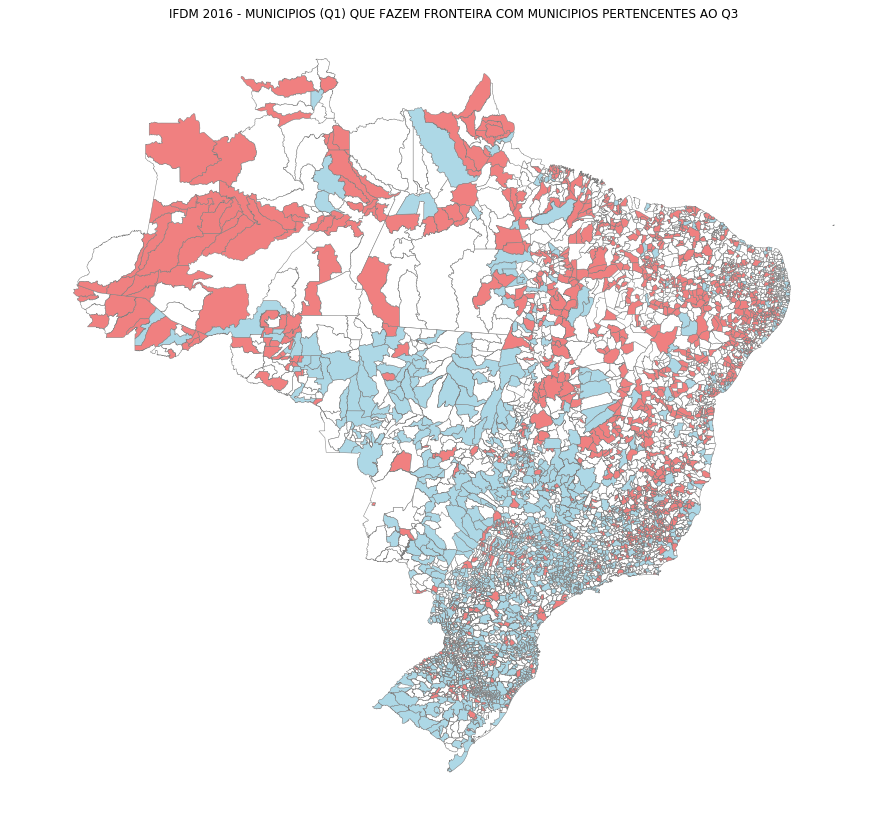

In [244]:
fig, ax = plt.subplots(figsize=(15, 15))
brasil_fronteira.plot(column='colors', cmap=cmap, figsize=(20,10), edgecolor='grey', linewidth=.5, ax=ax)
ax.set_axis_off()
ax.set_title("IFDM 2016 - MUNICIPIOS (Q1) QUE FAZEM FRONTEIRA COM MUNICIPIOS PERTENCENTES AO Q3");

### QUANTITATIVO DE MUNICIPIOS POR UF QUE ATENDEM AO CRITÉRIO DE FRONTEIRA

In [268]:
agg_data_municipios_uf = brasil_fronteira[brasil_fronteira['colors'] == 0.5]\
            .groupby(['UF', 'colors']).count()['GEOCODIGO']\
            .sort_values(ascending=False)\
            .unstack()
agg_data_municipios_uf.columns = ['num_municipios']
agg_data_municipios_uf.sort_values('num_municipios', ascending=False, inplace=True)

In [277]:
agg_data_municipios_uf

num_municipios
UF                
MG             252
BA             137
SP              91
PI              90
PE              77
MA              76
RS              64
PB              59
TO              54
CE              53
PA              42
GO              40
AM              38
AL              36
PR              29
RN              29
ES              29
SE              28
SC              24
RO              22
RJ              16
AC              13
AP              11
MT               7
RR               6
MS               4

### QUANTITATIVO DE MUNICIPIOS POR REGIÃO POLÍTICA QUE ATENDEM AO CRITÉRIO DE FRONTEIRA

In [280]:
agg_data_municipios_regiao = brasil_fronteira[brasil_fronteira['colors'] == 0.5].groupby(['REGIAO', 'colors'])\
        .count()['GEOCODIGO']\
        .sort_values(ascending=False).unstack()
agg_data_municipios_regiao.columns = ['num_municipios']
agg_data_municipios_regiao.sort_values('num_municipios', ascending=False, inplace=True)

In [281]:
agg_data_municipios_regiao

num_municipios
REGIAO                      
Nordeste                 585
Sudeste                  388
Norte                    186
Sul                      117
Centro-Oeste              51

## IDHM 

In [282]:
gis_merge_idhm = mapa.merge(idhm_global, how='left', left_on='GEOCODIGO', right_on='Código').copy()

In [283]:
gis_merge_idhm.head()

GEOCODIGO              NOME  UF  ID_UF REGIAO           MESOREGIAO  \
0    1200336       Mâncio Lima  AC     12  Norte        VALE DO JURUA   
1    1300201  Atalaia do Norte  AM     13  Norte  SUDOESTE AMAZONENSE   
2    1301654           Guajará  AM     13  Norte  SUDOESTE AMAZONENSE   
3    1200427   Rodrigues Alves  AC     12  Norte        VALE DO JURUA   
4    1200203   Cruzeiro do Sul  AC     12  Norte        VALE DO JURUA   

        MICROREGIA LATITUDE LONGITUDE  \
0  CRUZEIRO DO SUL   -7.614   -72.896   
1    ALTO SOLIMOES   -4.372   -70.192   
2            JURUA   -7.546   -72.584   
3  CRUZEIRO DO SUL   -7.742   -72.647   
4  CRUZEIRO DO SUL   -7.631    -72.67   

                                            geometry   Código  \
0  POLYGON ((-73.80098316 -7.111458, -73.73762495...  1200336   
1  POLYGON ((-73.80098316 -7.111458, -73.79617103...  1300201   
2  POLYGON ((-73.73762495999999 -7.13431700999999...  1301654   
3  POLYGON ((-73.69157987999999 -7.76778101999999...  1200427   
4  POLYGON ((-73.62958103999999 -8.05086, -73.423...  1200203   

     Espacialidades  IDHM 1991  IDHM 2000  IDHM 2010  
0       Mâncio Lima      0.298      0.456      0.625  
1  Atalaia do Norte      0.246      0.348      0.450  
2           Guajará      0.266      0.381      0.532  
3   Rodrigues Alves      0.245      0.399      0.567  
4   Cruzeiro do Sul      0.398      0.510      0.664

In [284]:
gis_merge_idhm['PK'] = gis_merge_idhm.apply(lambda x : str(x['GEOCODIGO'])+"_"+str(x['Código']), axis='columns')
gis_merge_idhm['PK'] = gis_merge_idhm['PK'].astype(str)

In [286]:
gis_merge_idhm.shape, gis_merge_idhm['PK'].drop_duplicates().shape

((5807, 16), (5564,))

In [287]:
gis_merge_idhm = gis_merge_idhm.loc[gis_merge_idhm['PK'].drop_duplicates().index]

In [288]:
gis_merge_idhm.set_index('PK', inplace=True)

In [289]:
gis_merge_idhm.head()

GEOCODIGO              NOME  UF  ID_UF REGIAO  \
PK                                                               
1200336_1200336    1200336       Mâncio Lima  AC     12  Norte   
1300201_1300201    1300201  Atalaia do Norte  AM     13  Norte   
1301654_1301654    1301654           Guajará  AM     13  Norte   
1200427_1200427    1200427   Rodrigues Alves  AC     12  Norte   
1200203_1200203    1200203   Cruzeiro do Sul  AC     12  Norte   

                          MESOREGIAO       MICROREGIA LATITUDE LONGITUDE  \
PK                                                                         
1200336_1200336        VALE DO JURUA  CRUZEIRO DO SUL   -7.614   -72.896   
1300201_1300201  SUDOESTE AMAZONENSE    ALTO SOLIMOES   -4.372   -70.192   
1301654_1301654  SUDOESTE AMAZONENSE            JURUA   -7.546   -72.584   
1200427_1200427        VALE DO JURUA  CRUZEIRO DO SUL   -7.742   -72.647   
1200203_1200203        VALE DO JURUA  CRUZEIRO DO SUL   -7.631    -72.67   

                                                          geometry   Código  \
PK                                                                            
1200336_1200336  POLYGON ((-73.80098316 -7.111458, -73.73762495...  1200336   
1300201_1300201  POLYGON ((-73.80098316 -7.111458, -73.79617103...  1300201   
1301654_1301654  POLYGON ((-73.73762495999999 -7.13431700999999...  1301654   
1200427_1200427  POLYGON ((-73.69157987999999 -7.76778101999999...  1200427   
1200203_1200203  POLYGON ((-73.62958103999999 -8.05086, -73.423...  1200203   

                   Espacialidades  IDHM 1991  IDHM 2000  IDHM 2010  
PK                                                                  
1200336_1200336       Mâncio Lima      0.298      0.456      0.625  
1300201_1300201  Atalaia do Norte      0.246      0.348      0.450  
1301654_1301654           Guajará      0.266      0.381      0.532  
1200427_1200427   Rodrigues Alves      0.245      0.399      0.567  
1200203_1200203   Cruzeiro do Sul      0.398      0.510      0.664

In [290]:
gis_merge_idhm['colors'] = np.zeros(len(gis_merge_idhm))

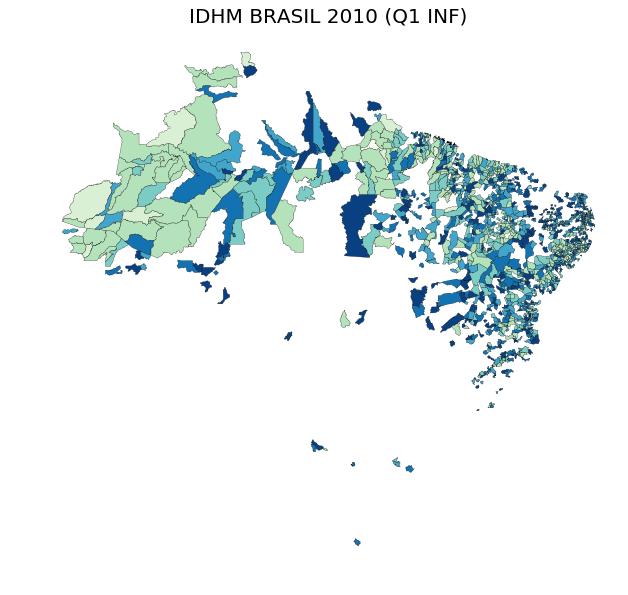

In [300]:
plot_details = {
    'indicador' : 'IDHM 2010',
    'tipo_indicador' : 'idhm',
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .25,
        'edgecolor' : 'black',
        'title_text' : 'IDHM BRASIL 2010 (Q1 INF)'
    },
    'filename' : 'q1_inf_brasil_idhm_2010_GnBu'
}
q1_inf_brasil_idhm = select_quantile_and_plot(gis_merge_idhm, .25, smaller_and_equal=True, **plot_details)

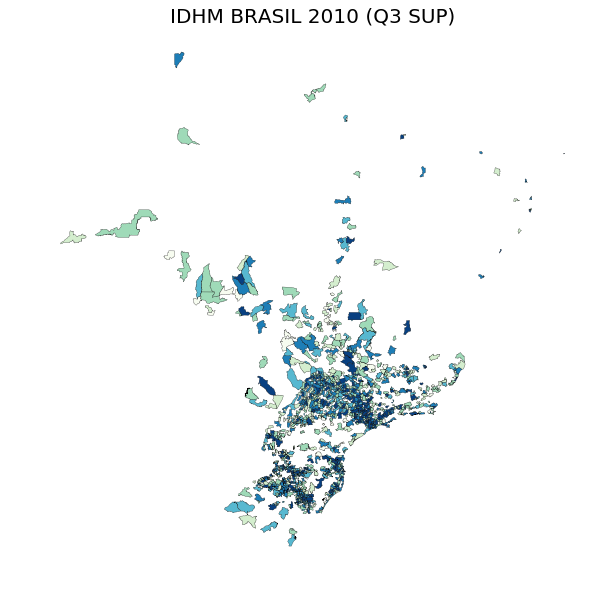

In [299]:
plot_details = {
    'indicador' : 'IDHM 2010',
    'tipo_indicador' : 'idhm',
    'plot' : {
        'figsize' : (12, 10),
        'cmap' : 'GnBu',
        'k' : 10,
        'linewidth' : .25,
        'edgecolor' : 'black',
        'title_text' : 'IDHM BRASIL 2010 (Q3 SUP)'
    },
    'filename' : 'q3_sup_brasil_idhm_2010_GnBu'
}
q3_sup_brasil_idhm = select_quantile_and_plot(gis_merge_idhm, .75, smaller_and_equal=False, **plot_details)